#Encuesta Permanente de Hogares (EPH)

La Encuesta Permanente de Hogares (EPH) es un programa nacional de producción sistemática y permanente de indicadores sociales llevado a cabo por el Instituto Nacional de Estadística y Censos (INDEC), que permite conocer las características sociodemográficas y socioeconómicas de la población. Es realizada en forma conjunta con las Direcciones Provinciales de Estadística. La EPH abarca 31 aglomerados urbanos donde habita, aproximadamente, el 70% de la población urbana del país. Cubre todas las capitales de provincia y aglomerados urbanos de más de 100 mil habitantes. Tiene una periodicidad trimestral. Se realizan 4 estimaciones por año de los principales indicadores del mercado de trabajo.

La EPH es una encuesta por muestreo. Dado que todas las muestras presentan limitaciones, errores de muestreo, se advierte sobre la precaución que se debe tener en la interpretación de los datos.

Los datos orginales pueden encontrarse en el siguiente link:
> https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos

La documentacion se encuentra en el siguiente link:
> https://www.indec.gob.ar/ftp/cuadros/menusuperior/eahu/EPH_tot_urbano_estructura_bases_2023.pdf

### 1. Bibliotecas necesarias y configuracion

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import pointbiserialr, spearmanr
from collections import Counter

In [3]:
# Establecer la paleta de colores
sns.set_palette("coolwarm")

### 2. Carga de Dataframe

In [4]:
# Obtener la ruta del directorio base del proyecto
base_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(
    base_dir, '..', 'data', 'preprocessed'))

# Guardar el archivo en el directorio
file_path = os.path.join(data_dir, 'preprocessed_codificacion_eda.csv')

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)


### 3. Estructura y formato de los datos

In [5]:
df.head()

CODUSU  NRO_HOGAR  COMPONENTE  REGION  CH03  CH07  \
0  TQRMNOPYQHMLKNCDEHJGH00699689          1           2      40     3     5   
1  TQRMNOPYSHMLKNCDEHJGH00699098          1           2      40     3     5   
2  TQRMNOPYSHMLKNCDEHJGH00699098          1           3      40     3     5   
3  TQRMNOPQRHLOKOCDEHJGH00708317          1           2      40     3     5   
4  TQRMNOPQRHLOKOCDEHJGH00708317          1           3      40     3     5   

   CH10  CH15  CH16  ESTADO  ...  V2_M  IV2  II1  II2  IX_TOT  IX_MEN10  \
0     1     1     1       2  ...   0.0  3.0  3.0    2       2         0   
1     1     1     1       1  ...   0.0  5.0  5.0    3       4         0   
2     1     1     1       3  ...   0.0  5.0  5.0    3       4         0   
3     1     1     1       3  ...   0.0  4.0  4.0    3       5         1   
4     1     1     1       3  ...   0.0  4.0  4.0    3       5         1   

   IX_MAYEQ10     ITF  CH06_jefx  ratio_ocupados  
0           2   54000         58            0.50  
1           4  184000         51            0.75  
2           4  184000         51            0.75  
3           4   26000         38            0.20  
4           4   26000         38            0.20  

[5 rows x 102 columns]

#### 3.1 Nombres de las columnas

In [6]:
columnas = df.columns
print(columnas)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'CH03', 'CH07', 'CH10',
       'CH15', 'CH16', 'ESTADO',
       ...
       'V2_M', 'IV2', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF',
       'CH06_jefx', 'ratio_ocupados'],
      dtype='object', length=102)


#### 3.2 Estructura de los datos

In [7]:
#Informacion
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31146 entries, 0 to 31145
Columns: 102 entries, CODUSU to ratio_ocupados
dtypes: float64(6), int64(95), object(1)
memory usage: 24.2+ MB
None


In [8]:
# Tipos de datos
print("\nColumnas y tipos de datos:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)


Columnas y tipos de datos:
CODUSU                        object
NRO_HOGAR                      int64
COMPONENTE                     int64
REGION                         int64
CH03                           int64
CH07                           int64
CH10                           int64
CH15                           int64
CH16                           int64
ESTADO                         int64
CAT_INAC                       int64
PP02E                          int64
PP02E_jefx                     int64
H15                            int64
CH09                           int64
CH11                           int64
PP02H                          int64
PP07I                          int64
PP07H                          int64
PP04B1                         int64
REALIZADA                      int64
IV5                            int64
IV8                            int64
IV12_1                         int64
IV12_2                         int64
IV12_3                         int64
II3       

In [9]:
# Valores únicos
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'CODUSU': ['TQRMNOPYQHMLKNCDEHJGH00699689' 'TQRMNOPYSHMLKNCDEHJGH00699098'
 'TQRMNOPQRHLOKOCDEHJGH00708317' ... 'TQRMNOPYVHKKKUCDEHPJB00790876'
 'TQRMNOTQRHKNKOCDEGGFB00788638' 'TQRMNOQQYHKOLOCDEIJAH00792056']
Valores únicos en 'NRO_HOGAR': [ 1  2  3  5  4 51 72 73 71]
Valores únicos en 'COMPONENTE': [ 2  3  4  5  1  7  6  8  9 11 12 10 14]
Valores únicos en 'REGION': [40 43  1 44 41 42]
Valores únicos en 'CH03': [ 3  2  1  9  8  5  4 10  6  7]
Valores únicos en 'CH07': [   5    2    1    3    4 -999]
Valores únicos en 'CH10': [1]
Valores únicos en 'CH15': [   1    3    4    2    5 -999]
Valores únicos en 'CH16': [   1    2    3    5    4 -999    0]
Valores únicos en 'ESTADO': [2 1 3 0]
Valores únicos en 'CAT_INAC': [0 3 1 2]
Valores únicos en 'PP02E': [0 2 5 3 4]
Valores únicos en 'PP02E_jefx': [0 4 5 2 3]
Valores únicos en 'H15': [1 0]
Valores únicos en 'CH09': [1 0]
Valores únicos en 'CH11': [   1    0 -999]
Valores únicos en 'PP02H': [0 1]
Valores únicos en 'PP07I

#### 3.3 Recuento de valores únicos para cada columna categórica

In [10]:
columnas_categoricas = ['NRO_HOGAR', 'COMPONENTE', 'REGION', 'CH03', 'CH07',
    'CH10', 'CH15', 'CH16', 'ESTADO', 'CAT_INAC', 'PP02E', 'PP02E_jefx',
    'H15', 'CH09', 'CH11', 'PP02H', 'PP07I', 'PP07H', 'PP04B1', 'REALIZADA', 'IV5', 'IV8',
    'IV12_1', 'IV12_2', 'IV12_3', 'II3', 'II4_1', 'II4_2', 'II4_3', 'V1', 'V2',
    'V21', 'V22', 'V3', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V14',
    'REALIZADA_jefx', 'CH04_jefx', 'PP07I_jefx', 'PP07H_jefx', 'PP04B1_jefx',
    'REALIZADA_conyuge', 'CH04_conyuge', 'JEFE_TRABAJA', 'CONYUGE_TRABAJA',
    'JEFA_MUJER', 'HOGAR_MONOP', 'NBI_SUBSISTENCIA', 'NBI_COBERTURA_PREVISIONAL',
    'NBI_DIFLABORAL', 'NBI_HACINAMIENTO', 'NBI_SANITARIA', 'NBI_TENENCIA',
    'NBI_TRABAJO_PRECARIO', 'NBI_VIVIENDA', 'NBI_ZONA_VULNERABLE', 'DESERTO',
    'MAS_500', 'CH04', 'II8', 'IV6', 'IV7', 'IV9', 'IV10', 'IV11', 'CH08', 'TRIMESTRE',
    'CAT_OCUP', 'DECINDR', 'NIVEL_ED', 'IV1', 'IV3', 'IV4', 'II7', 'DECCFR',
    'ESTADO_jefx', 'NIVEL_ED_jefx', 'CAT_OCUP_jefx', 'ANO4', 'II9', 'ESTADO_conyuge'
    ]
for columna in columnas_categoricas:
    print(df[columna].value_counts())

1     30326
2       756
3        51
4         4
51        4
72        2
5         1
73        1
71        1
Name: NRO_HOGAR, dtype: int64
3     11207
2      6491
4      6425
1      3164
5      2510
6       818
7       304
8       139
9        41
11       18
12       14
10       13
14        2
Name: COMPONENTE, dtype: int64
43    9060
40    8112
44    4110
1     3651
42    3155
41    3058
Name: REGION, dtype: int64
3     22676
1      3242
5      2161
2      1505
8       549
9       530
4       256
10      210
6        15
7         2
Name: CH03, dtype: int64
 5      27445
 1       2465
 2        823
 3        367
 4         44
-999        2
Name: CH07, dtype: int64
1    31146
Name: CH10, dtype: int64
 1      26157
 3       2653
 2       1822
 4        269
 5        242
-999        3
Name: CH15, dtype: int64
 1      29855
 3        581
 2        559
 5         88
 4         60
-999        2
 0          1
Name: CH16, dtype: int64
3    23335
1     6783
2      998
0       30
Name: ESTADO, dt

#### 3.4 Descripción de los datos numéricos

In [11]:
columnas_numericas = [
    'AGLOMERADO', 'PONDERA', 'CH06', 'T_VI', 'V2_M', 'IV2', 'II1', 'II2',
    'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'CH06_jefx', 'ratio_ocupados'
    ]
print(df[columnas_numericas].describe())

         AGLOMERADO       PONDERA          CH06          T_VI           V2_M  \
count  3.114600e+04  31146.000000  31146.000000  3.114600e+04   31146.000000   
mean   7.750243e+05    589.239678     21.332049  2.652942e+03     420.657035   
std    5.093879e+05   1016.623920      7.802741  1.295689e+04    3934.070299   
min    0.000000e+00     14.000000     14.000000  0.000000e+00       0.000000   
25%    3.704786e+05    162.000000     16.000000  0.000000e+00       0.000000   
50%    8.000324e+05    273.000000     19.000000  0.000000e+00       0.000000   
75%    1.002547e+06    516.000000     24.000000  0.000000e+00       0.000000   
max    2.315148e+06  20635.000000     94.000000  1.247000e+06  210000.000000   

                IV2           II1           II2        IX_TOT      IX_MEN10  \
count  31146.000000  31146.000000  31146.000000  31146.000000  31146.000000   
mean       3.348680      3.323637      2.429975      4.217684      0.400051   
std        1.214528      1.216224      0.8

### 4. Manejo de datos faltantes

Los valores faltantes, como 9, 99, 999, 9999, se consideran, a menos que se indique lo contrario, como la categoría "No sabe/No responde". Otros valores faltantes son aquellos que resultaron de una codificación deficiente. Para manejar estos valores faltantes, se realizó la siguiente imputación:


*   Para variables categóricas: se asignó el valor -999.
*   Para valores faltantes numéricos y aquellos identificados como -9, se imputó utilizando la media.

Un caso especial son aquellas columnas con codigo 0 que no esta indicado en el dicccionaro de la columna e identifica los casos a los cuales no les corresponde la secuencia analizada. En cuyo caso se dejó el valor cero.

Por ultimo, en el caso de las columnas del tipo numericas, los faltantes fueron inputados con la mediana.

### 5. Análisis Univariado de Estudiantes de Nivel Medio

#### 5.1  Perfil socioeconómico y demográfico de los estudiantes


*   Todos los individuos son estudiantes de nivel medio con primaria completa y secundario incompleto.
*   La mayoría de los individuos tienen edades entre 13 y 30 años.
*   La mayor parte de los estudiantes son solteros, viven en casa de sus padres o tutor, y asisten a escuelas públicas.
*   Un gran porcentaje de los estudiantes se encuentran ubicados en las regiones del Noreste y la Pampa y nacieron en la misma ciudad donde viven actualmente, sin haberse mudado.
*   Son individuos inactivos, es decir, que no trabajan y no cuentan con cobertura previsional.
*   La mayoría de las viviendas de los estudiantes cuentan con baño y cocina, mientras que otros espacios como lavadero o garage ya no están presentes en proporciones similares. La gran mayoría de las viviendas no son utilizadas para trabajar.

*   Gran parte de las familias viven del sueldo de un trabajo, y algunas han recibido ayuda social del estado. El nivel educativo del jefe de hogar tiene una distribución homogénea desde con estudios de primaria hasta universitarios.

*   Pocos individuos viven en zonas vulnerables y tienen trabajo precario, casi todos cuentan con algún tipo de cobertura médica. La edad del mayor porcentaje de los jefes de hogar ronda los 35 y 60 años.

*   El mayor porcentaje de estudiantes son mujeres.
*   Un porcentaje menor desertó en los estudios.

#### 5.2 Visualizacion de Distribucion: variables categoricas y numericas

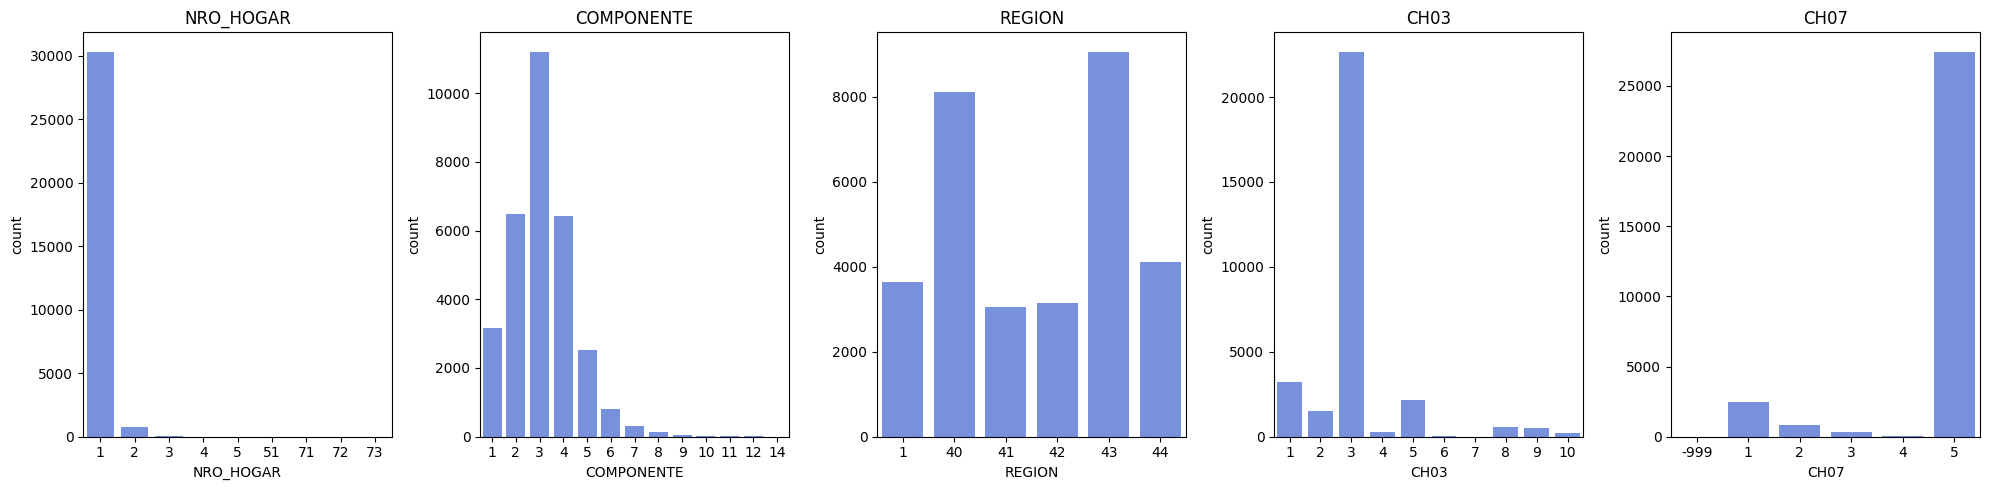

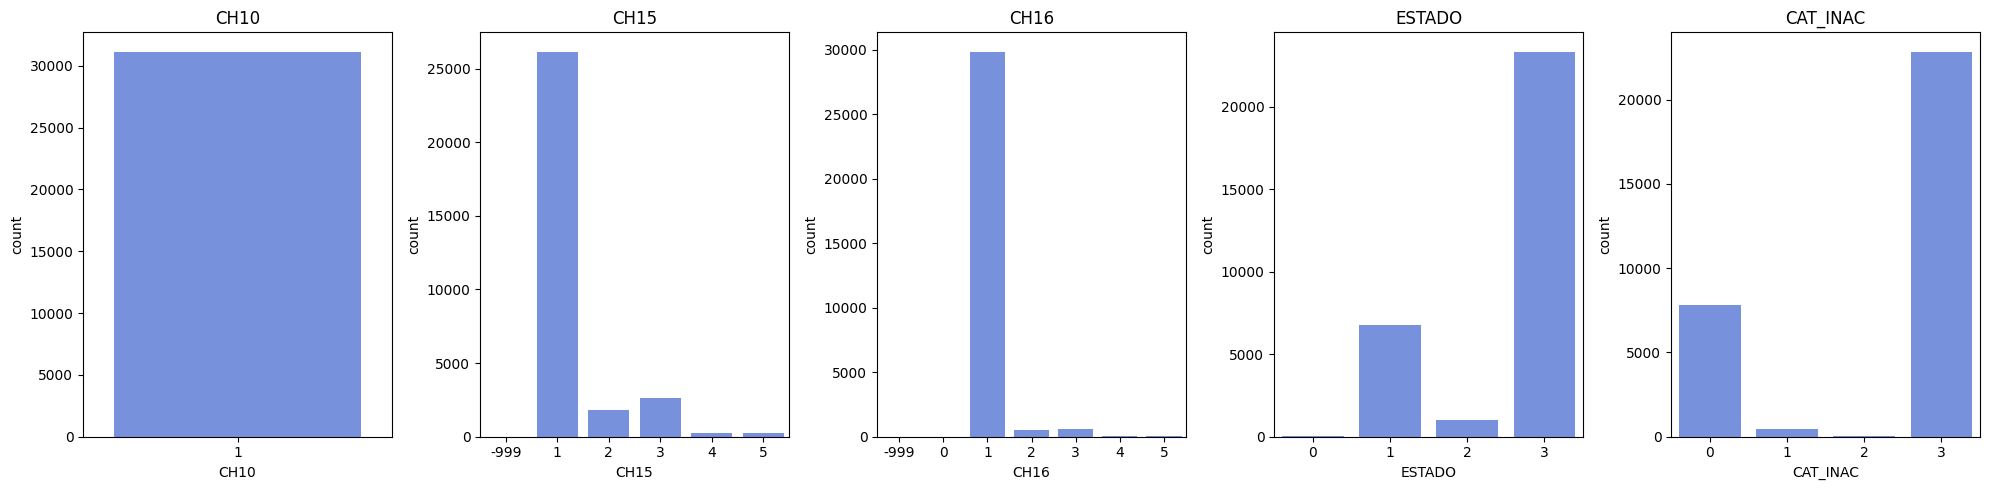

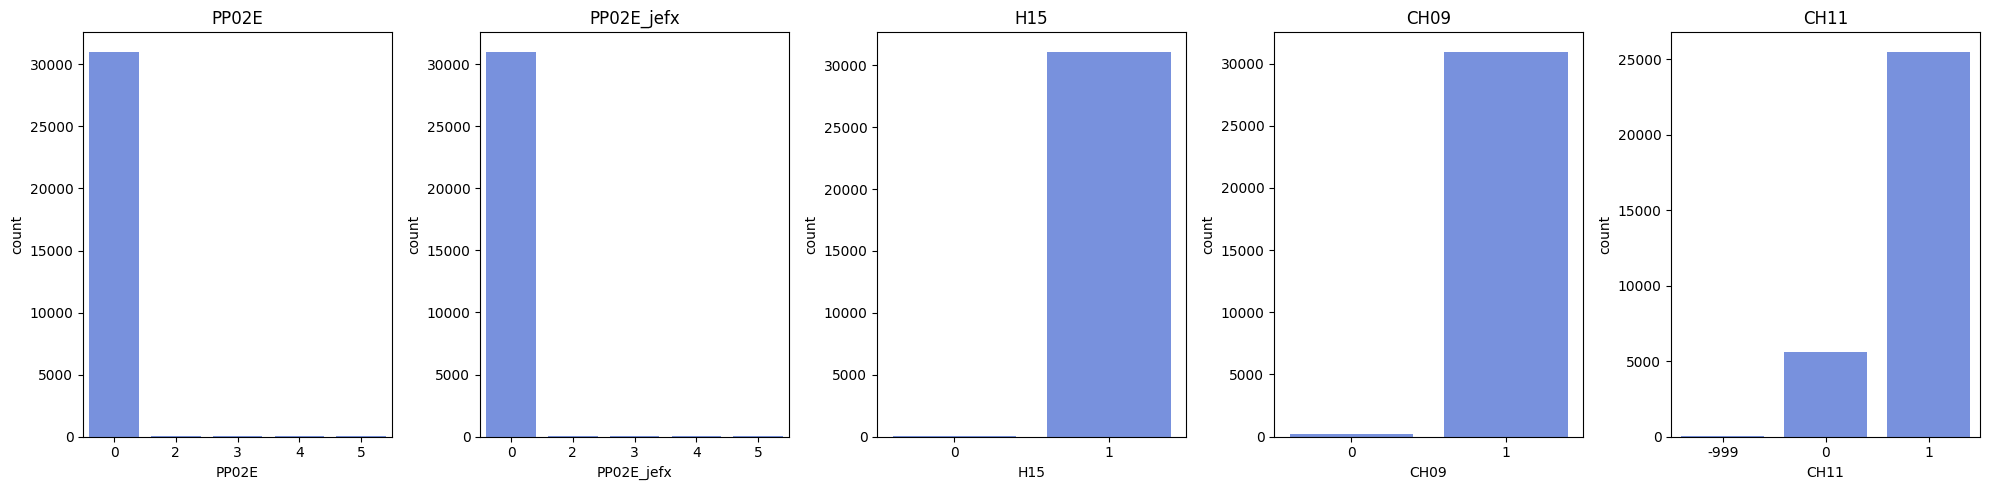

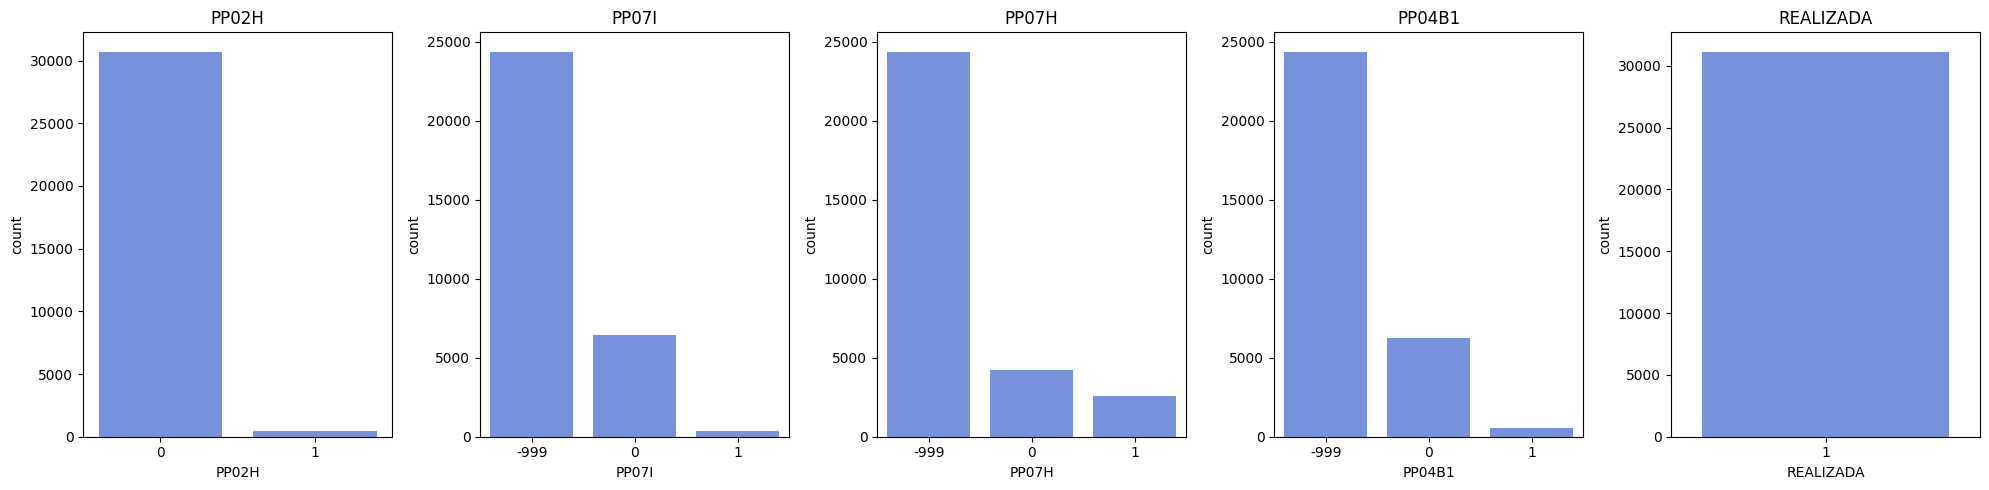

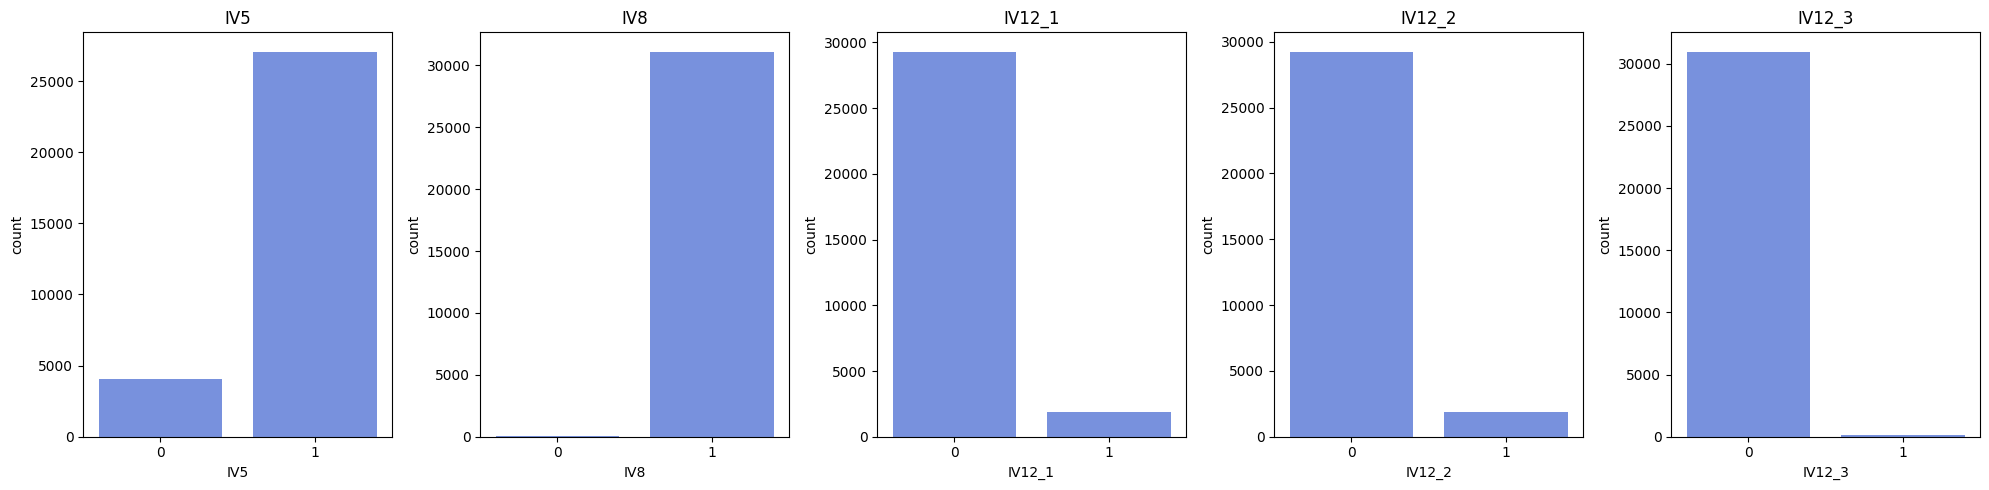

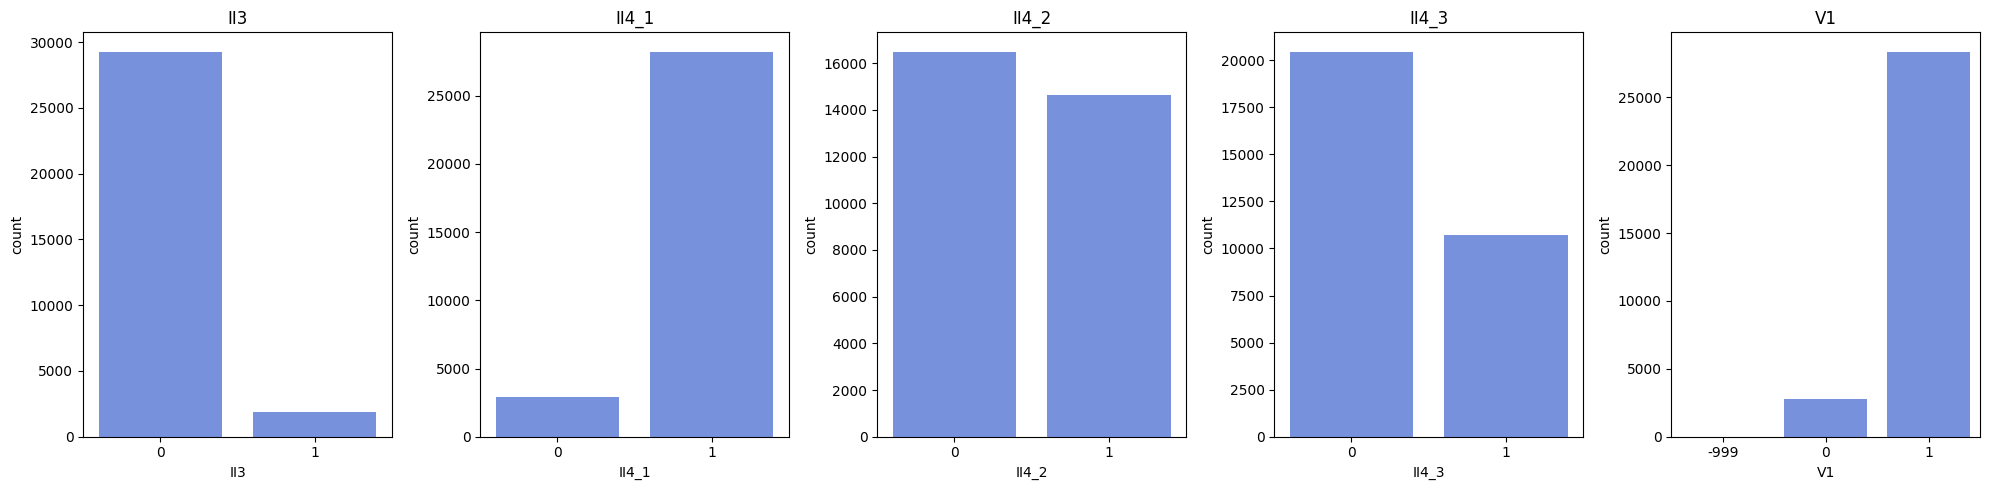

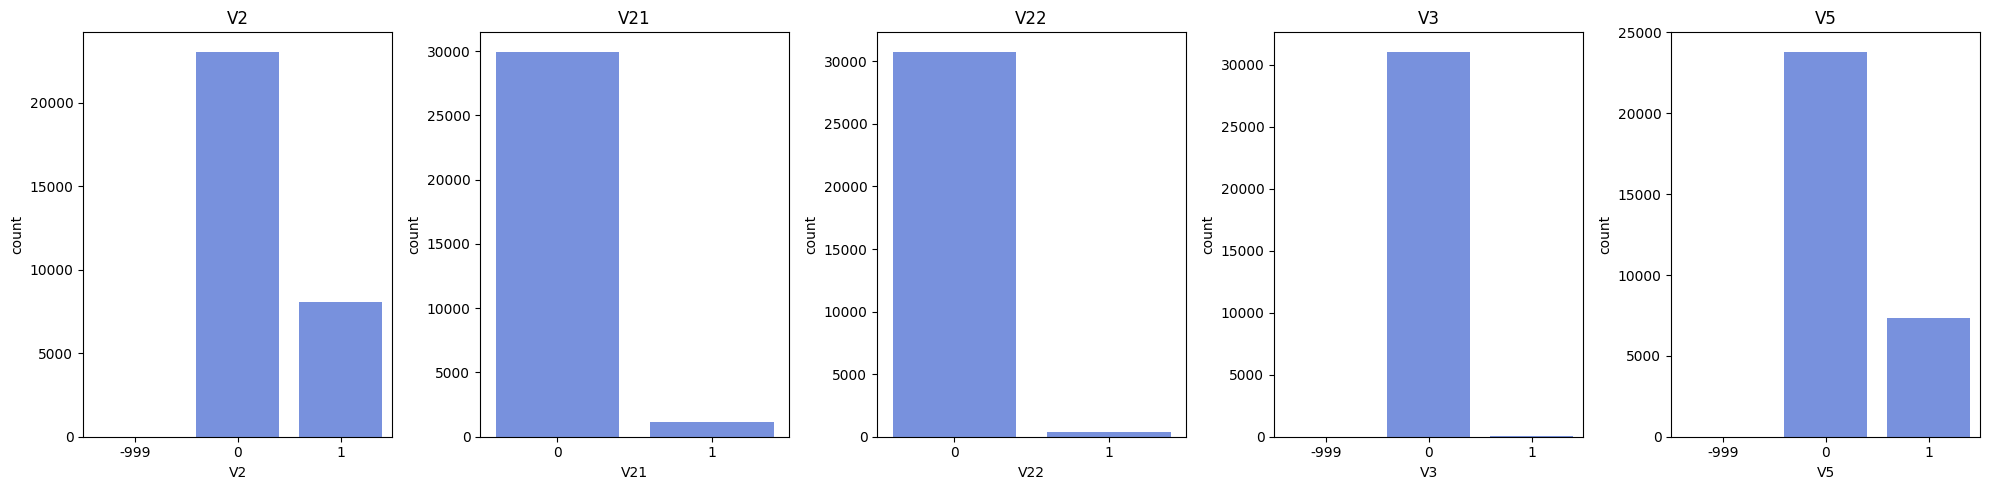

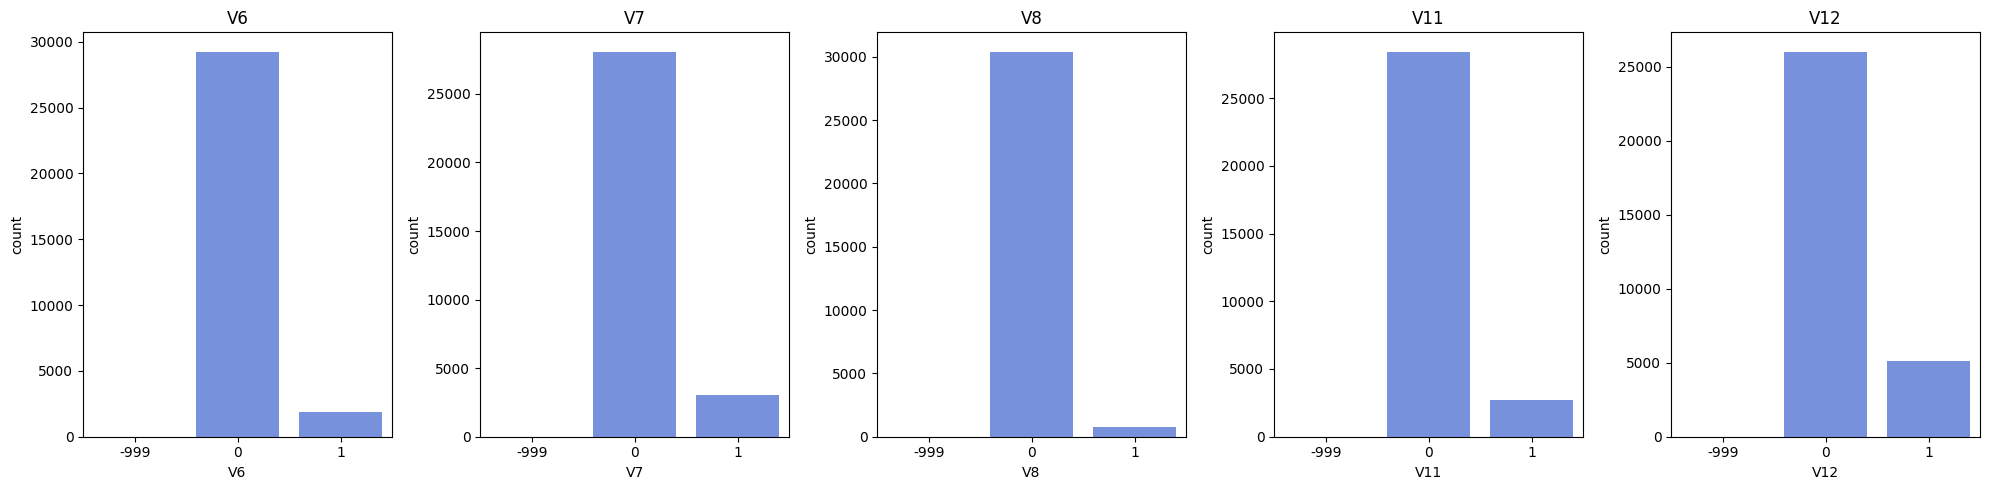

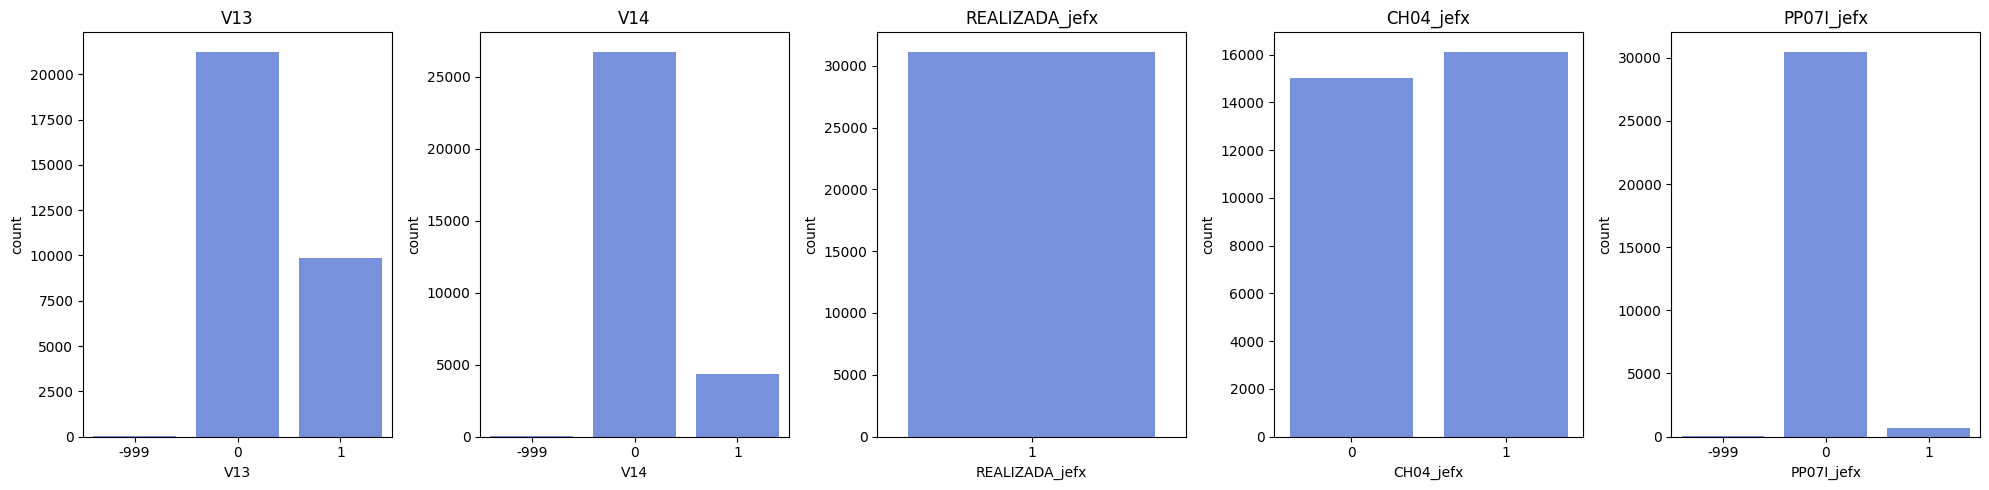

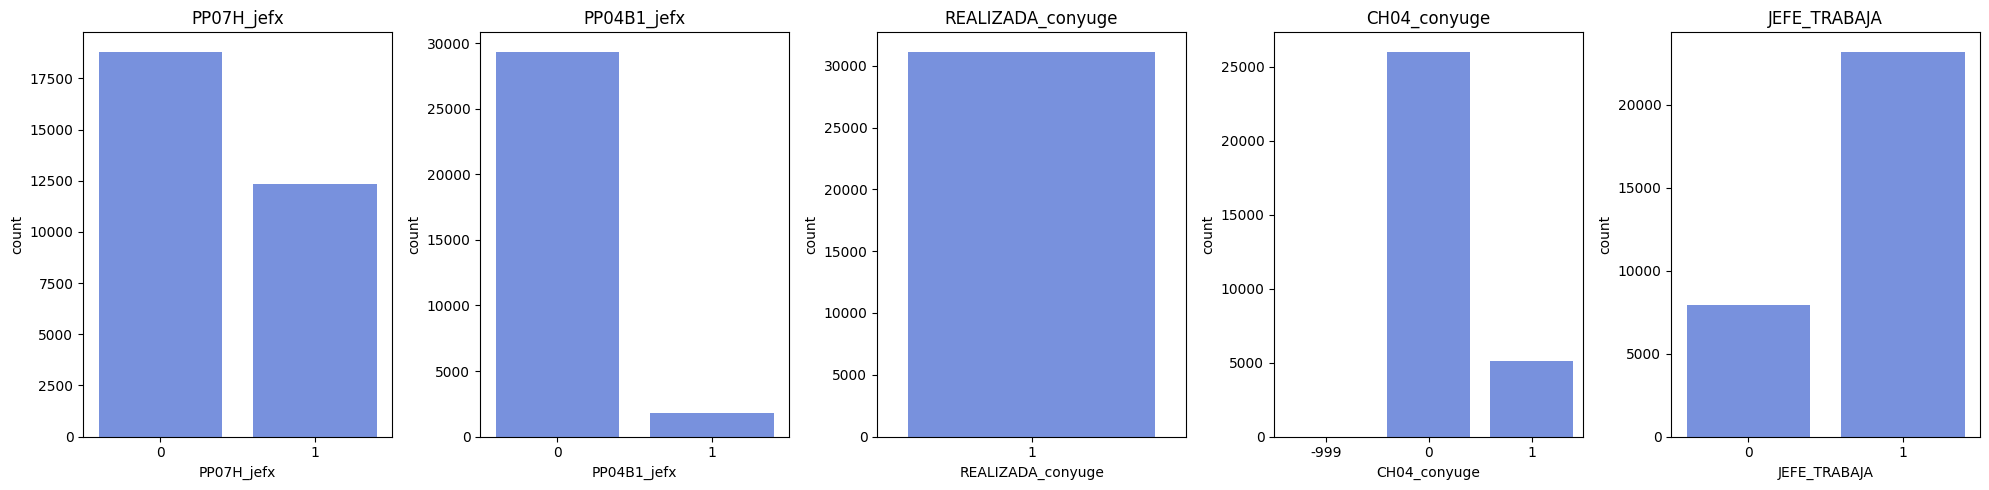

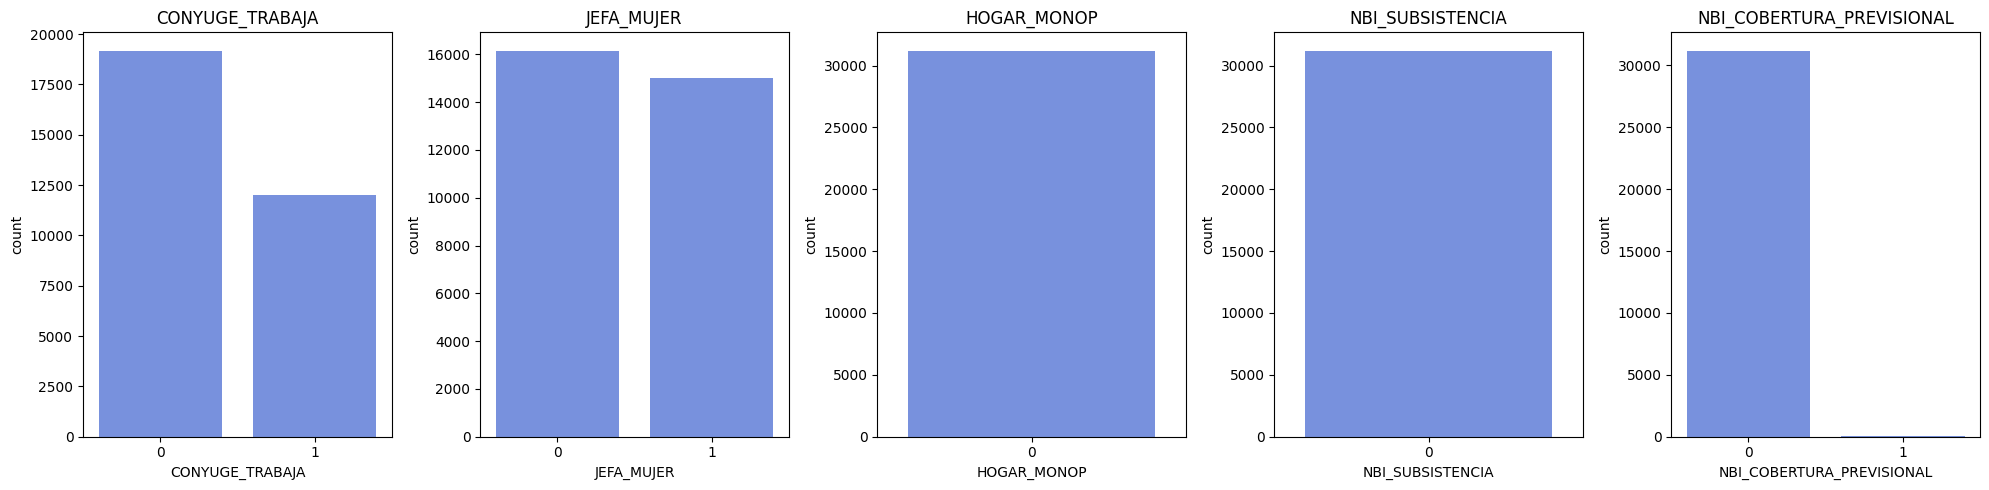

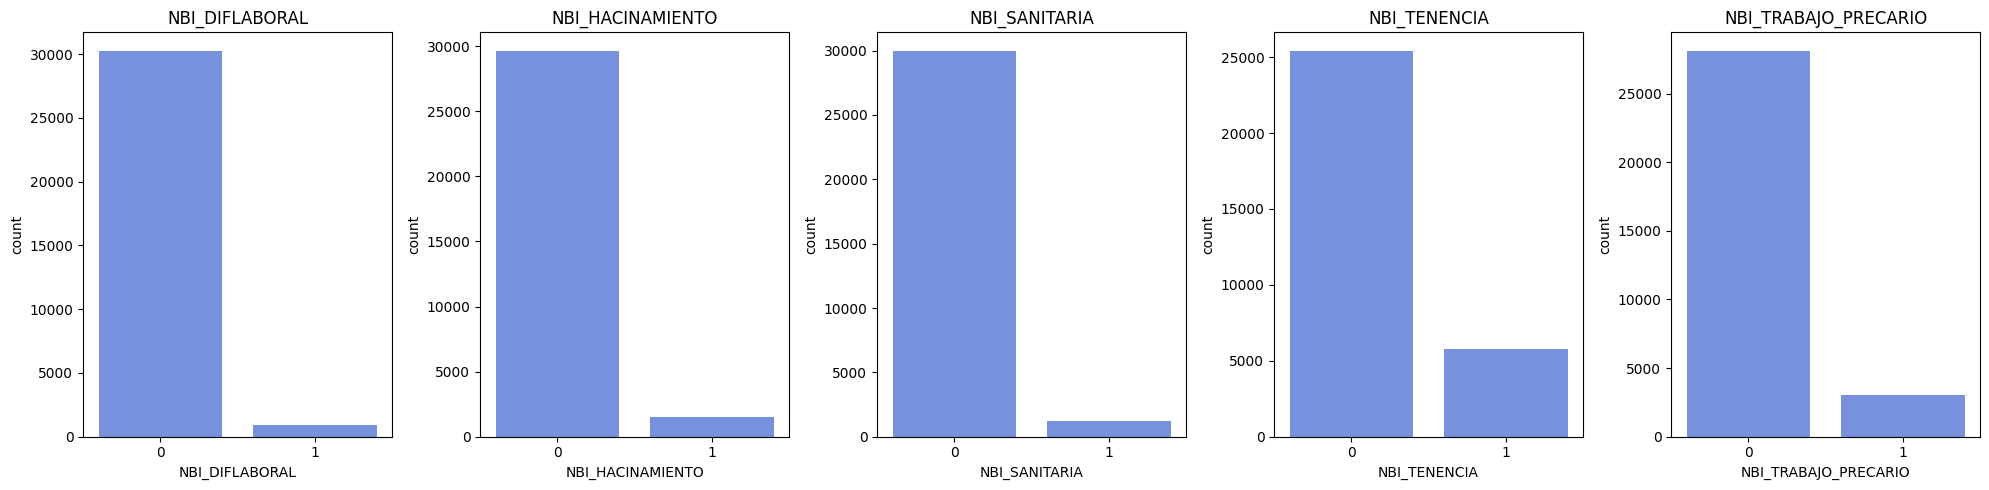

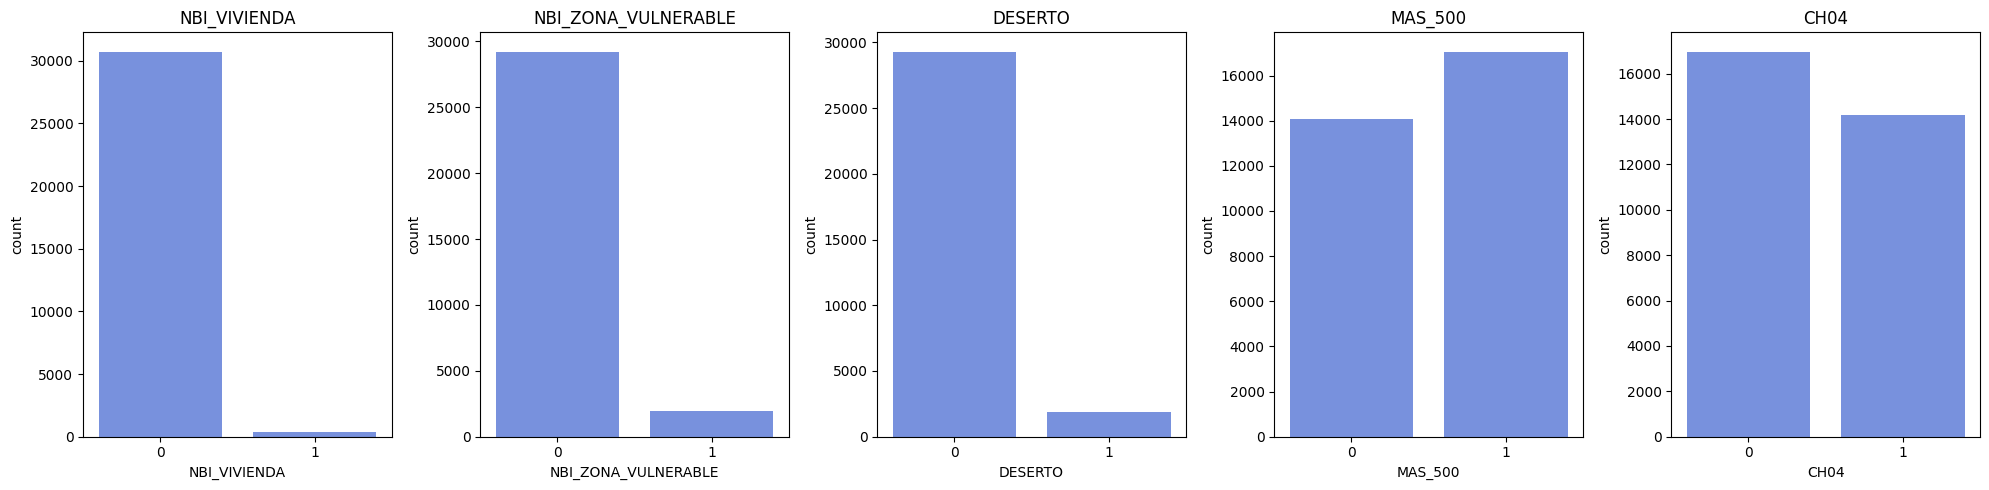

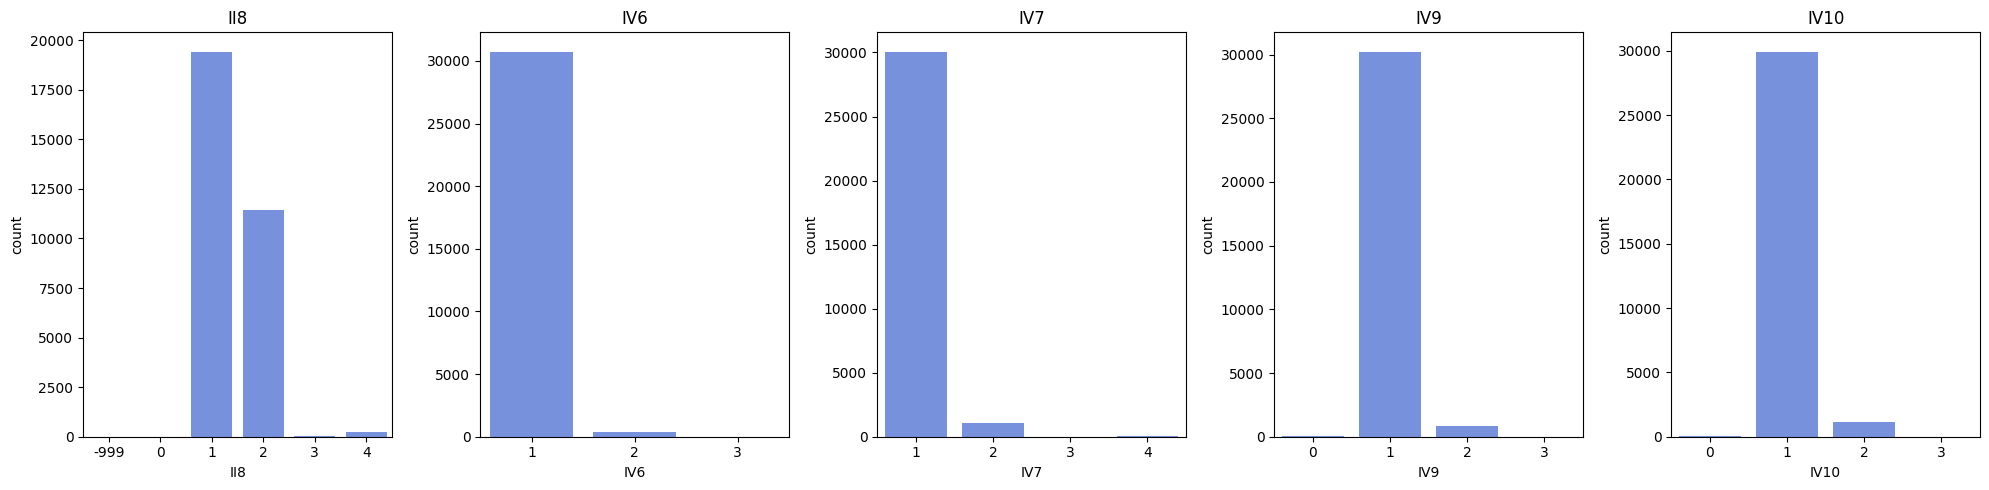

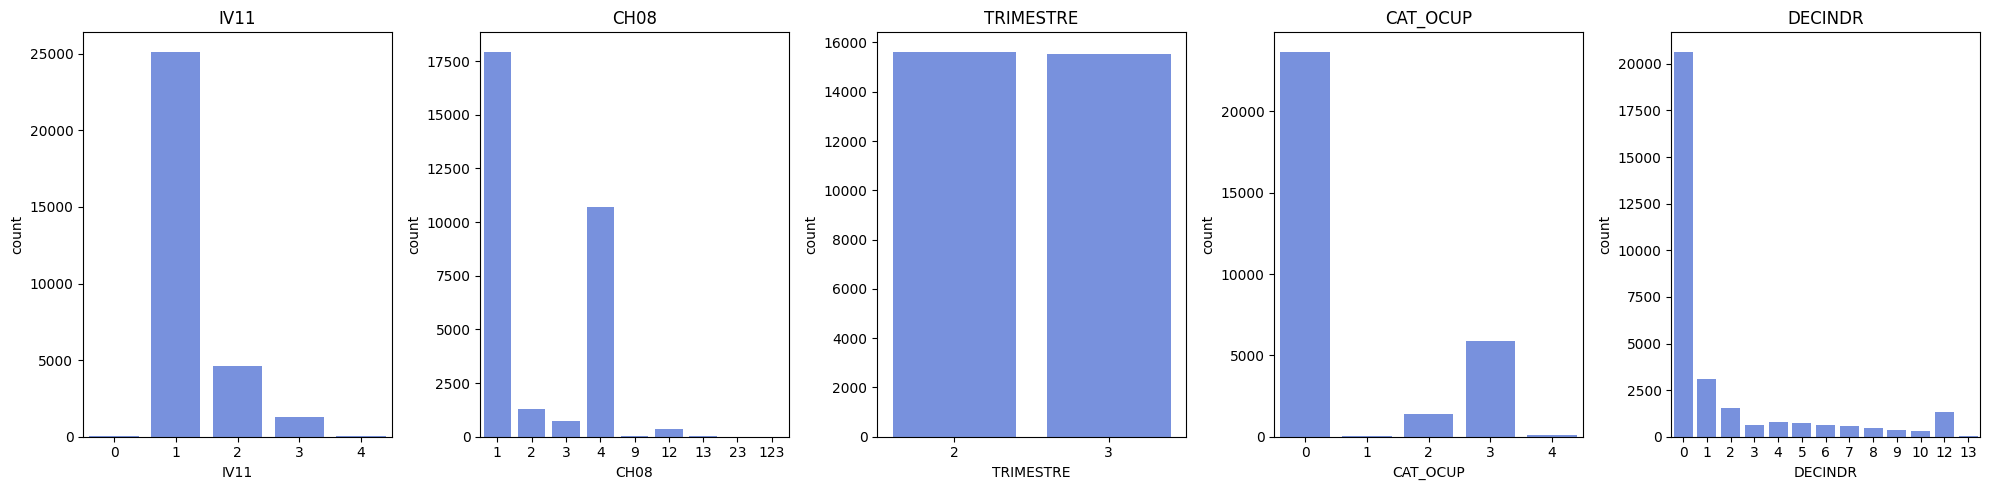

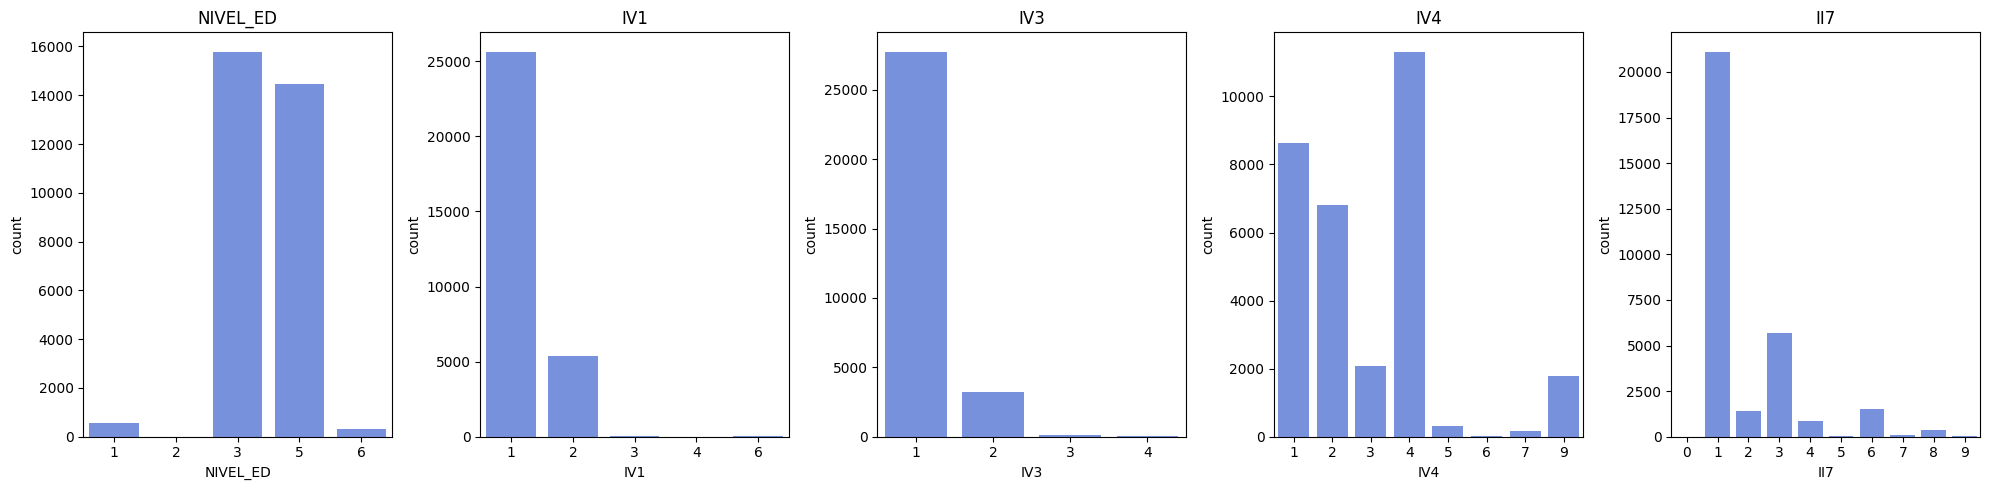

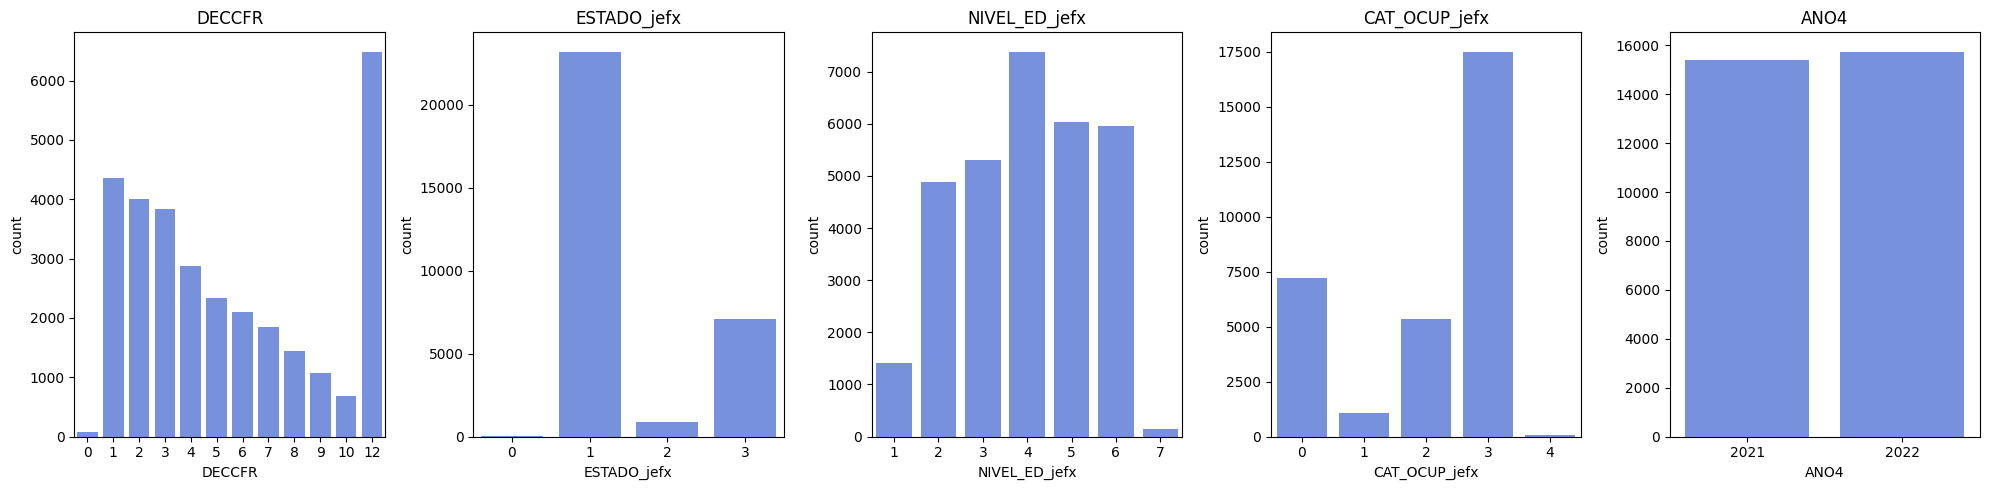

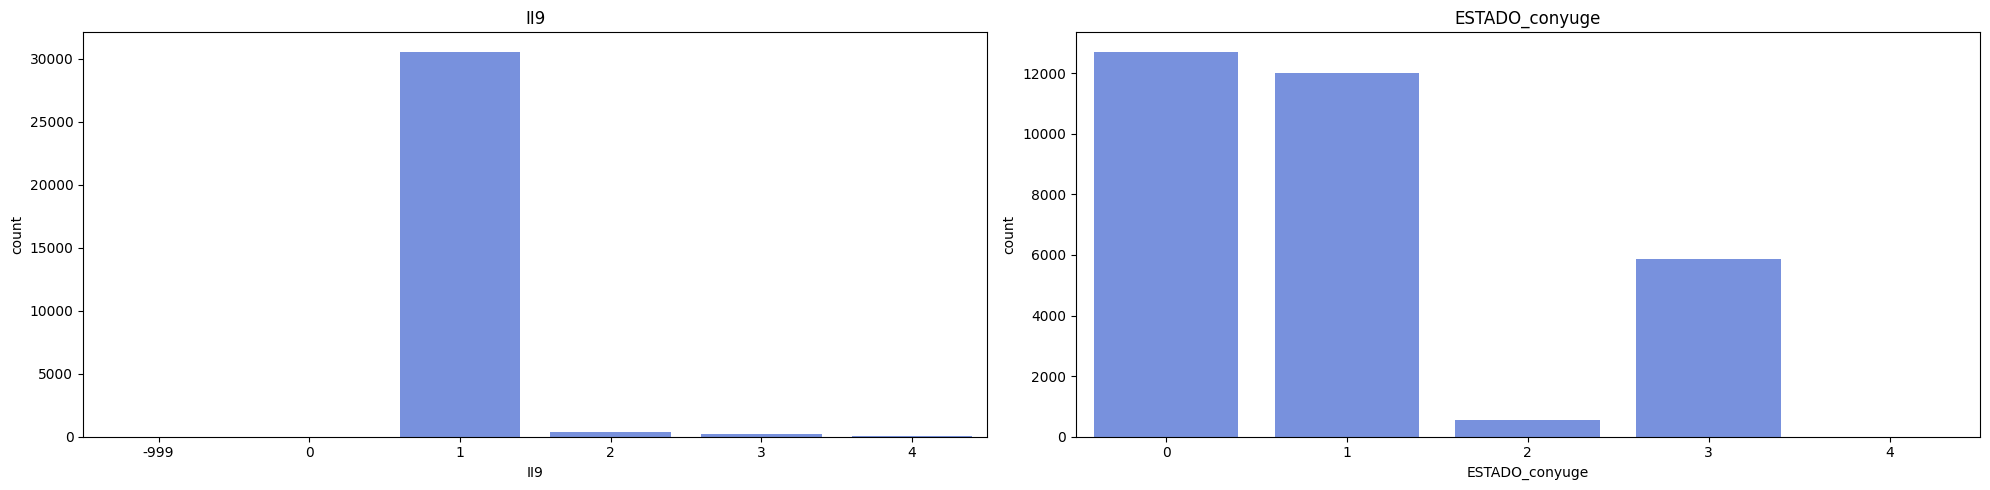

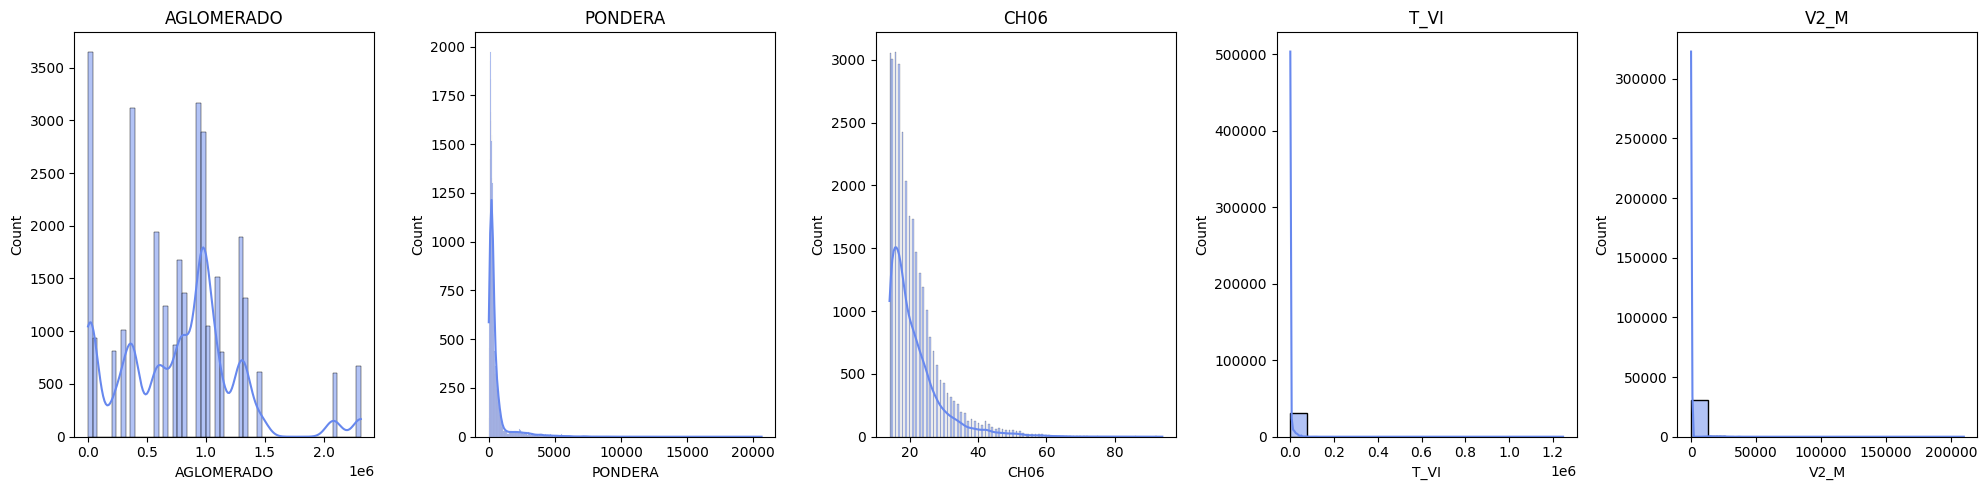

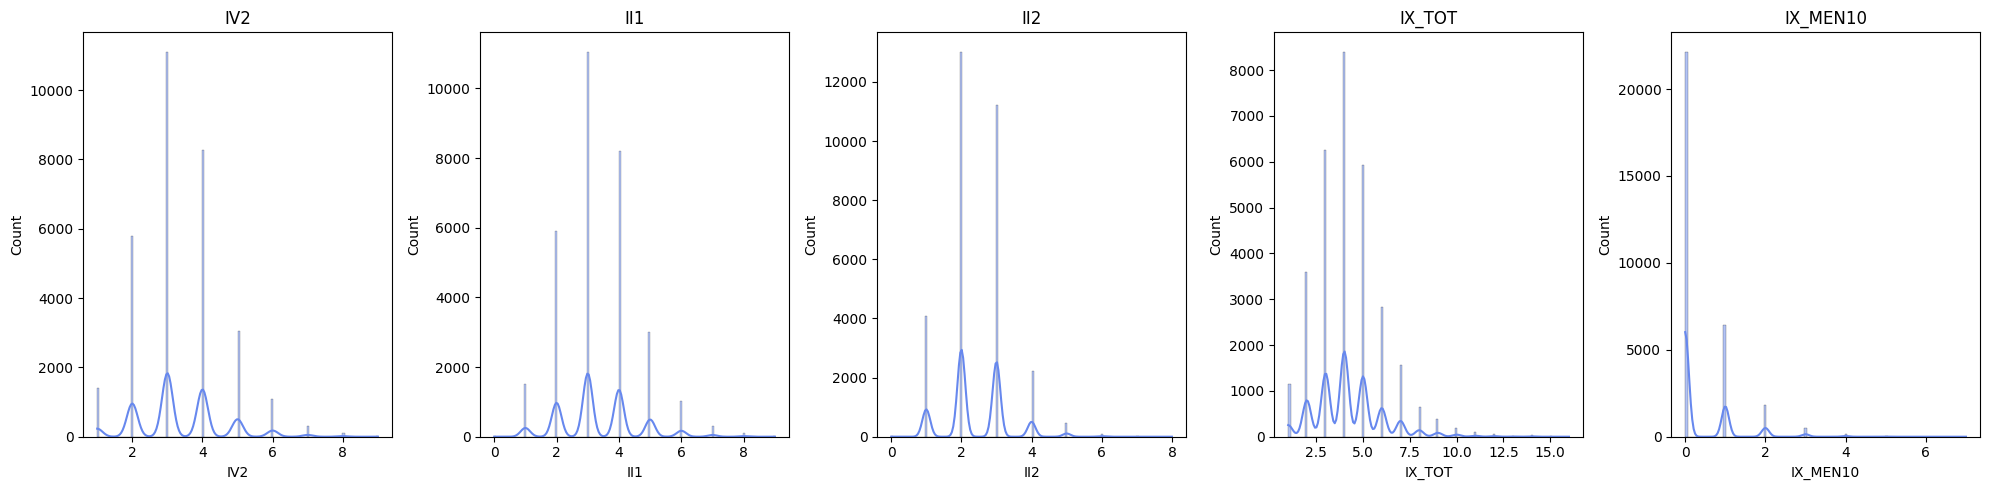

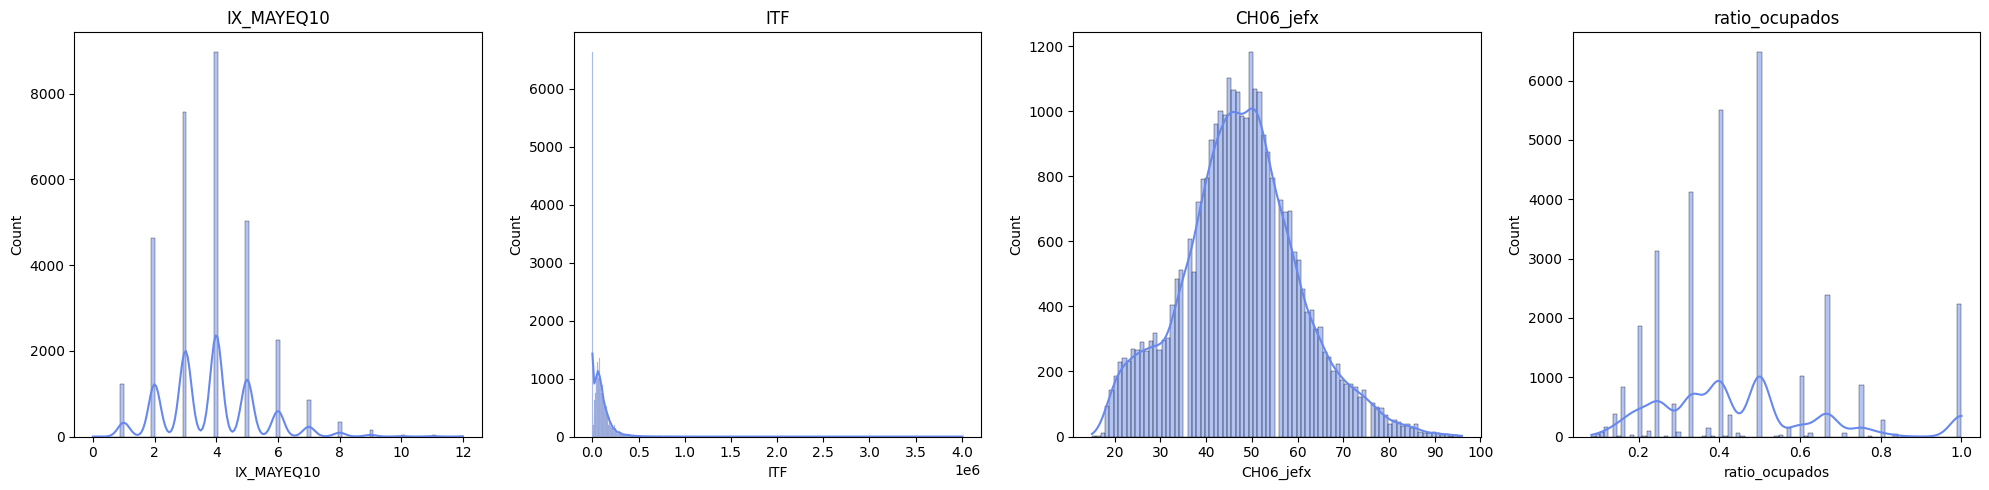

In [12]:
cols_per_row = 5

#Subgráficos por filas para las columnas categóricas
categorical_groups = [columnas_categoricas[i:i+cols_per_row] for i in range(0, len(columnas_categoricas), cols_per_row)]
for group in categorical_groups:
    fig, axs = plt.subplots(1, len(group), figsize=(20, 5))
    for i, col in enumerate(group):
        sns.countplot(data=df, x=col, ax=axs[i])
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()

# Crear subgráficos por filas para las columnas numéricas
numeric_groups = [columnas_numericas[i:i+cols_per_row] for i in range(0, len(columnas_numericas), cols_per_row)]
for group in numeric_groups:
    fig, axs = plt.subplots(1, len(group), figsize=(20, 5))
    for i, col in enumerate(group):
        sns.histplot(data=df, x=col, ax=axs[i], kde=True)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()


In [13]:
# Porcentajes de la variable objetivo
porcentaje_clase_1 = df['DESERTO'].value_counts(normalize=True)[1] * 100
porcentaje_clase_0 = df['DESERTO'].value_counts(normalize=True)[0] * 100

print(f"Porcentaje de la clase 1: {porcentaje_clase_1:.2f}%")
print(f"Porcentaje de la clase 0: {porcentaje_clase_0:.2f}%")

Porcentaje de la clase 1: 5.93%
Porcentaje de la clase 0: 94.07%


#### 5.3 Consideraciones sobre la Distribución de Clases en el Dataset

Se observa un desequilibrio de clases, especialmente en las clases binarias, como la variable objetivo "DESERTO". En esta clase, solo el 5.93% de las muestras representa al caso positivo de desercion escolar, mientras que la clase negativa constituye el restante 94.07%.

Este desequilibrio puede tener diversas implicaciones en el análisis y modelado de los datos. Por un lado, los modelos de aprendizaje automático pueden tener dificultades para detectar patrones en la clase minoritaria, lo que podría resultar en un rendimiento deficiente en la predicción de esta clase. Por el otro, las métricas de evaluación estándar, como la precisión, pueden estar sesgadas debido a la predominancia de la clase mayoritaria.

Para abordar este desequilibrio, se consideran dos estrategias principales:

*   Sobremuestreo (oversampling) de la clase minoritaria: Generación de muestras sintéticas de la clase minoritaria para equilibrar la distribución de clases.
*   Submuestreo (undersampling) de la clase mayoritaria: Reducción del número de muestras de la clase mayoritaria para equilibrar la distribución de clases.

### 6. Análisis Bivariado de Variables en Relación al Abandono Escolar

#### 6.1 Visualización de Distribuciones: Violines Bivariados

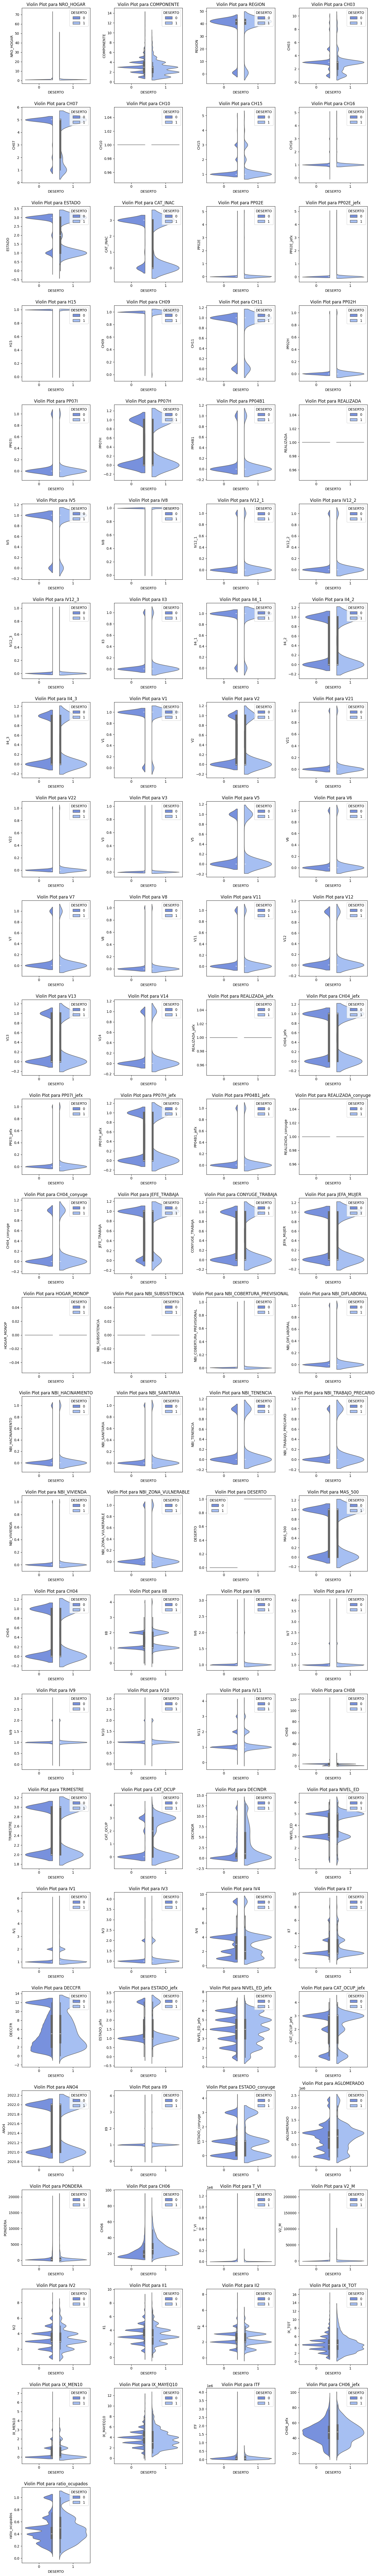

In [14]:
# Número de columnas por fila
num_cols_per_row = 4

# Excluir la primera columna al seleccionar las columnas para los gráficos de violín
columnas_para_graficos = df.columns[1:]  # Seleccionar todas las columnas excepto la primera

# Calcular el número total de filas necesarias
total_rows = (len(columnas_para_graficos) + num_cols_per_row - 1) // num_cols_per_row

# Crear la figura con un tamaño adecuado
plt.figure(figsize=(15, 4 * total_rows))

# Excluir valores -999 para el cálculo
df_filtered = df.replace(-999, np.nan)

# Crear un gráfico de violín para cada columna
for i, col in enumerate(columnas_para_graficos):

    plt.subplot(total_rows, num_cols_per_row, i + 1)
    sns.violinplot(x="DESERTO", y=col, data=df_filtered,  hue="DESERTO", split=True)
    plt.title(f'Violin Plot para {col}')

plt.tight_layout()
plt.show()

#### 6.2 Relación entre Variables y Abandono Escolar
En este analisis se estudia la relacion entre dos variables el target "DESERTO" y otra. Esto permite identificar patrones, asociaciones y posibles causalidades entre las variables. Se observaron tres tipos de comportamiento:

Distribución Amplia:
'COMPONENTE', 'REGION', 'CH03', 'CH07', 'CH15', 'ESTADO', 'CAT_INAC', 'CH11', 'PP07H', 'II4_2', 'II4_3', 'V2', 'V5', 'V13', 'V14', 'CH04_jefx', 'PP07H_jefx', 'CH04_conyuge', 'JEFE_TRABAJA', 'CONYUGE_TRABAJA', 'JEFA_MUJER','NBI_TENENCIA', 'NBI_TRABAJO_PRECARIO',  'MAS_500', 'CH04', 'II8', 'TRIMESTRE', 'CAT_OCUP', 'DECINDR', 'NIVEL_ED', 'IV4', 'II7', 'DECCFR', 'ESTADO_jefx', 'NIVEL_ED_jefx', 'CAT_OCUP_jefx', 'ANO4', 'ESTADO_conyuge', 'AGLOMERADO', 'CH06', 'IV2', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'CH06_jefx', 'ratio_ocupados'

Esta forma indica una distribución relativamente uniforme de los datos sin una concentración fuerte de valores en ninguna región específica.  Al relacionarlas con el objetivo, se observa que algunas de estas variables tienen una influencia en la probabilidad de deserción. Por ejemplo, la variable CH06 muestra una distribución amplia en la edad de los estudiantes que desertaron en comparación con los que no, lo que sugiere que la edad juega un papel en la decisión de desertar. Por otro lado, la variable CH06_jefx tiene la misma distribucion en ambas clases DESERTO y NO desertó, lo que sugiere que no aporta tanta información al target.

Líneas Horizontales:
'CH10', 'REALIZADA', 'REALIZADA_jefx', 'REALIZADA_conyuge', 'HOGAR_MONOP', 'NBI_SUBSISTENCIA', 'DESERTO'
    
Esta forma indica una distribución altamente concentrada alrededor de un valor específico, lo que sugiere que la mayoría de los datos tienen un valor similar y hay poca variabilidad en los datos. Esta forma puede ser común en aquellas variables donde la mayoría de los casos comparten una respuesta muy común a una pregunta. Esto tambien podría sugerir que esa categoría no está fuertemente relacionada con la variable dependiente. Por ejemplo, la variable Hogar monoparental muestra una línea horizontal alrededor del 0, indicando que casi ningun estudiante reside en un hogar monoparental, lo quye sugiere que 'HOGAR_MONOP' no está fuertemente relacionada con la deserción.

Distribución Asimétrica:
'NRO_HOGAR', 'CH16', 'PP02E', 'PP02E_jefx', 'H15', 'CH09', 'PP02H', 'PP07I', 'IV5', 'IV8', 'IV12_1', 'IV12_2', 'IV12_3', 'II3', 'II4_1', 'V1', 'V21', 'V22', 'V3', 'V6', 'V7', 'V8', 'V11', 'V12', 'PP07I_jefx', 'NBI_COBERTURA_PREVISIONAL','NBI_DIFLABORAL', 'NBI_HACINAMIENTO', 'NBI_SANITARIA', 'NBI_VIVIENDA','NBI_ZONA_VULNERABLE', 'IV6', 'IV7', 'IV9', 'IV10', 'IV11', 'CH08', 'IV1', 'IV3', 'II9', 'PONDERA', 'T_VI', 'V2_M', 'ITF'

Una distribución asimétrica en el violín y fuertemente sesgada en ambas clases (DESERTO y NO DESERTO) puede dificultar la interpretación de cómo esa variable afecta la variable objetivo. El sesgo en la distribución puede hacer que sea difícil determinar si la variable aporta información significativa para predecir la deserción escolar. Por ejemplo, se observa una leve diferentecia en la distribución sesgada a la derecha de los ingresos de los estudiantes, esto podría indicar que los estudiantes con mayores ingresos tienen menos probabilidades de desertar.

### 7. Analisis Multivariado: Exploración de Correlaciones, Visualización en Heatmap y Pairplot

#### 7.1 Calculo de Correlacion entre todas las Variables

In [16]:
# Eliminar la columna 'CODUSU'
columna_a_excluir = 'CODUSU'
df_CODUSU = df.drop(columns=[columna_a_excluir])

# Calcular la matriz de correlación de Spearman
correlacion_total = df_CODUSU.corr(method='spearman')

##### 7.1.1 Correlaciones mas Altas: Colinealidad entre Variables

In [17]:
# Seleccionar la mitad superior de la matriz de correlación
mask = np.triu(np.ones(correlacion_total.shape), k=1).astype(bool)
correlacion_superior = correlacion_total.where(mask)

# Crear un DataFrame para almacenar las correlaciones absolutas
correlacion_absoluta = correlacion_superior.abs()

# Convertir la matriz de correlación en una serie y ordenar los valores
correlacion_superior_serie = correlacion_absoluta.unstack().sort_values(ascending=False)

# Filtrar los valores para obtener solo las correlaciones más altas
correlaciones_altas = correlacion_superior_serie[correlacion_superior_serie > 0.6]

# Imprimir las correlaciones más altas
print(correlaciones_altas)

JEFA_MUJER            CH04_jefx               1.000000
PP04B1                PP07I                   0.995660
PP07H                 PP07I                   0.989912
PP04B1                PP07H                   0.989486
ESTADO_jefx           JEFE_TRABAJA            0.988890
NBI_ZONA_VULNERABLE   IV12_1                  0.979563
CAT_INAC              ESTADO                  0.973569
CAT_OCUP              ESTADO                  0.970549
II1                   IV2                     0.961691
IV10                  NBI_SANITARIA           0.948393
CAT_OCUP              CAT_INAC                0.943541
PP07I                 ESTADO                  0.943430
PP04B1                ESTADO                  0.943166
PP07H                 ESTADO                  0.938650
CAT_OCUP              PP04B1                  0.933009
                      PP07I                   0.932862
                      PP07H                   0.931851
IX_MAYEQ10            IX_TOT                  0.915869
PP07I     

##### 7.1.2 Hetmap

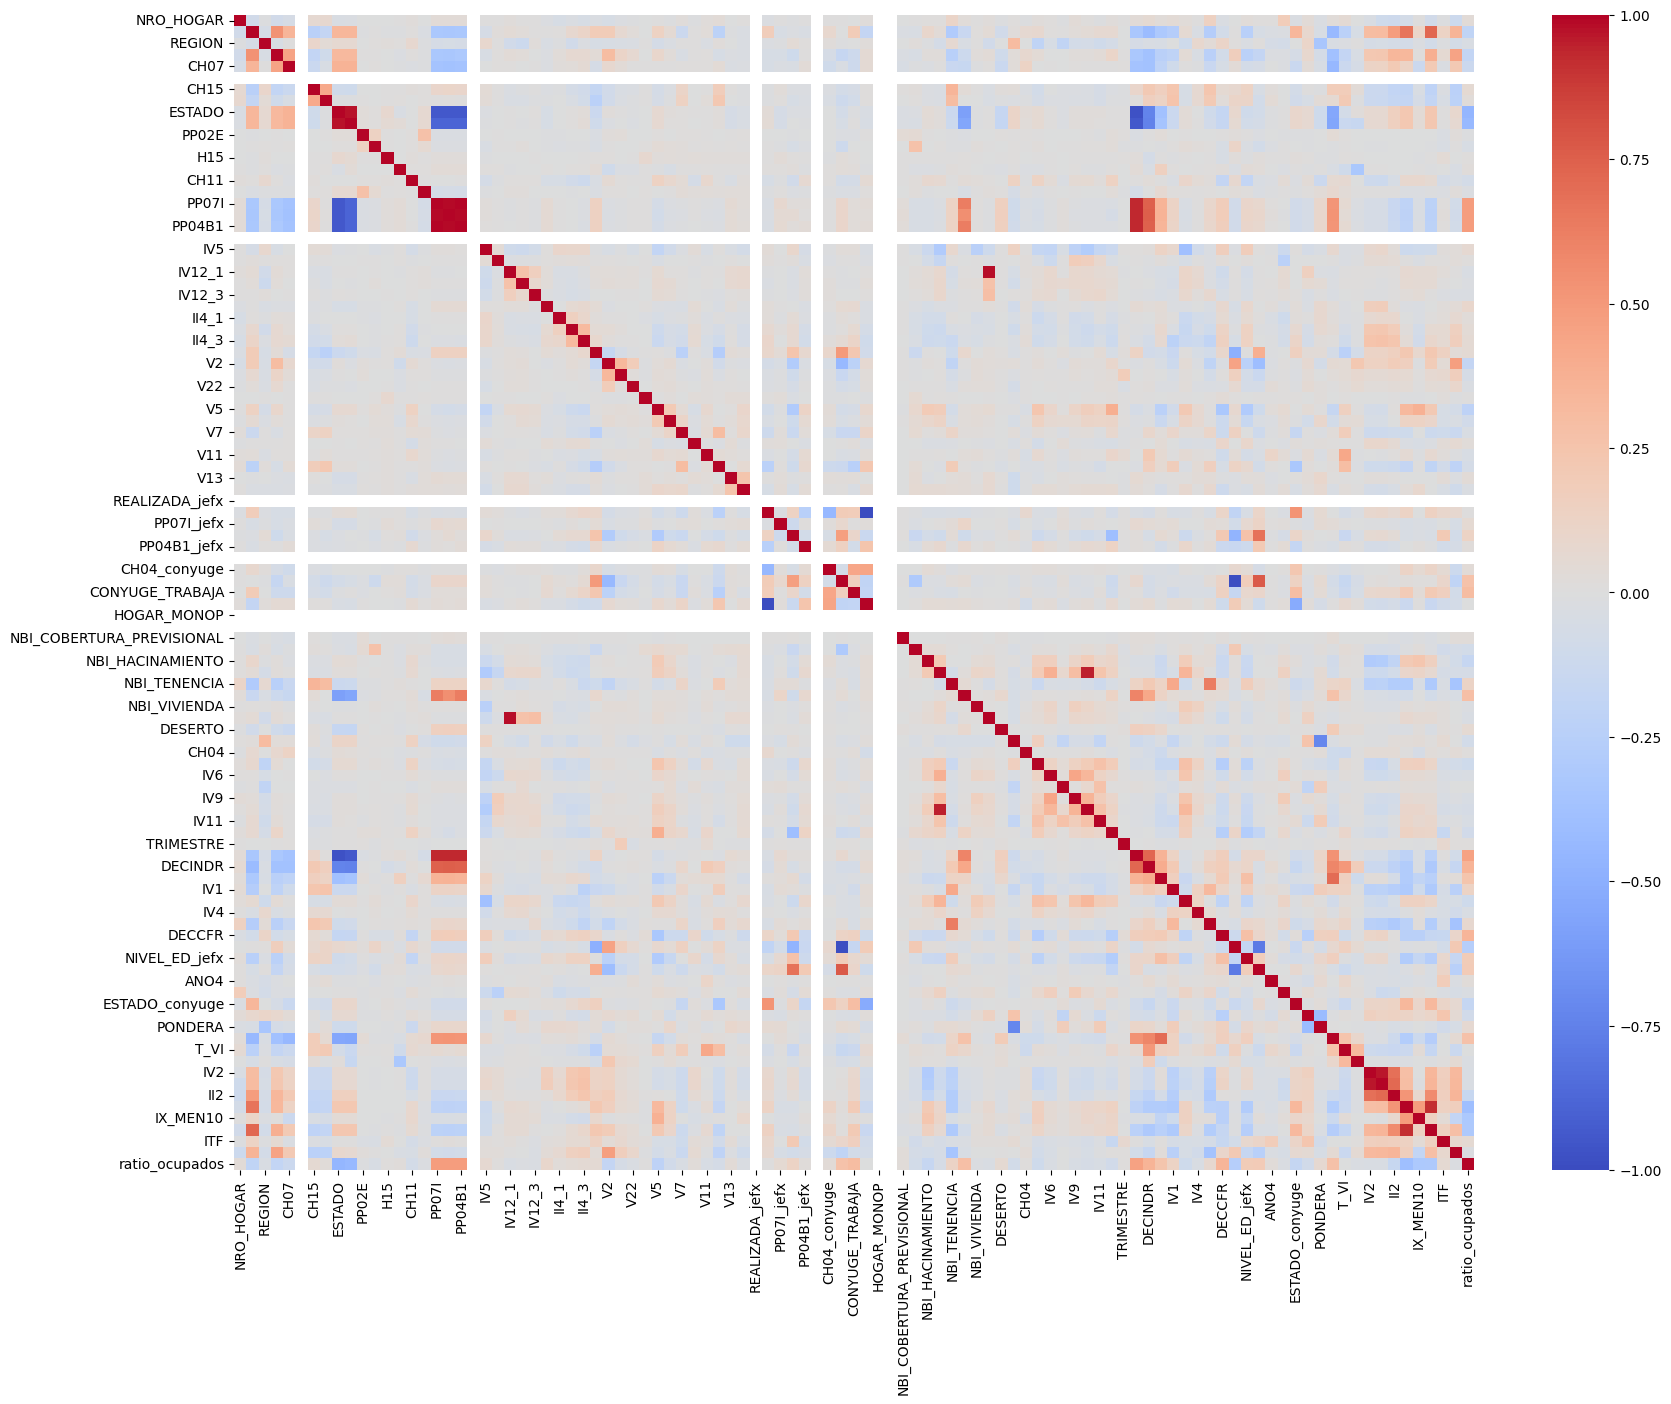

In [18]:
# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlacion_total, annot=False, cmap='coolwarm')
plt.show()

#### 7.2 Calculo de Correlacion entre Variables Categoricas y Numericas

In [19]:
# Calcular la matriz de correlación para las variables numéricas
correlacion_numericas = df[columnas_numericas].corr()

# Inicializar un DataFrame para almacenar las correlaciones
correlacion_mixta = pd.DataFrame(index=columnas_categoricas, columns=columnas_numericas)

# Calcular la correlación de Spearman solo para variables categóricas con más de un valor único
for col_cat in columnas_categoricas:
    if df[col_cat].nunique() > 1:
        for col_num in columnas_numericas:
            coef, _ = spearmanr(df[col_cat], df[col_num])
            correlacion_mixta.loc[col_cat, col_num] = coef

##### 7.2.1 Correlaciones mas Altas: Colinealidad entre Variables

In [20]:
# Crear un DataFrame para almacenar las correlaciones absolutas
correlacion_absoluta = correlacion_mixta.abs()

# Convertir la matriz de correlación mixta en una serie y ordenar los valores de forma descendente
correlacion_mixta_serie = correlacion_absoluta.unstack().sort_values(ascending=False)

# Filtrar los valores para obtener solo las correlaciones más altas
correlaciones_altas = correlacion_mixta_serie[correlacion_mixta_serie > 0.5]

# Imprimir las correlaciones más altas
print(correlaciones_altas)

PONDERA     MAS_500       0.724721
IX_MAYEQ10  COMPONENTE    0.722608
CH06        NIVEL_ED      0.702664
IX_TOT      COMPONENTE    0.665533
CH06        DECINDR       0.590768
            CAT_INAC      0.559752
            ESTADO        0.549878
            CAT_OCUP      0.537448
            PP07H         0.527611
            PP07I         0.520629
            PP04B1        0.519375
T_VI        DECINDR       0.506343
dtype: object


##### 7.2.2 Hetamap

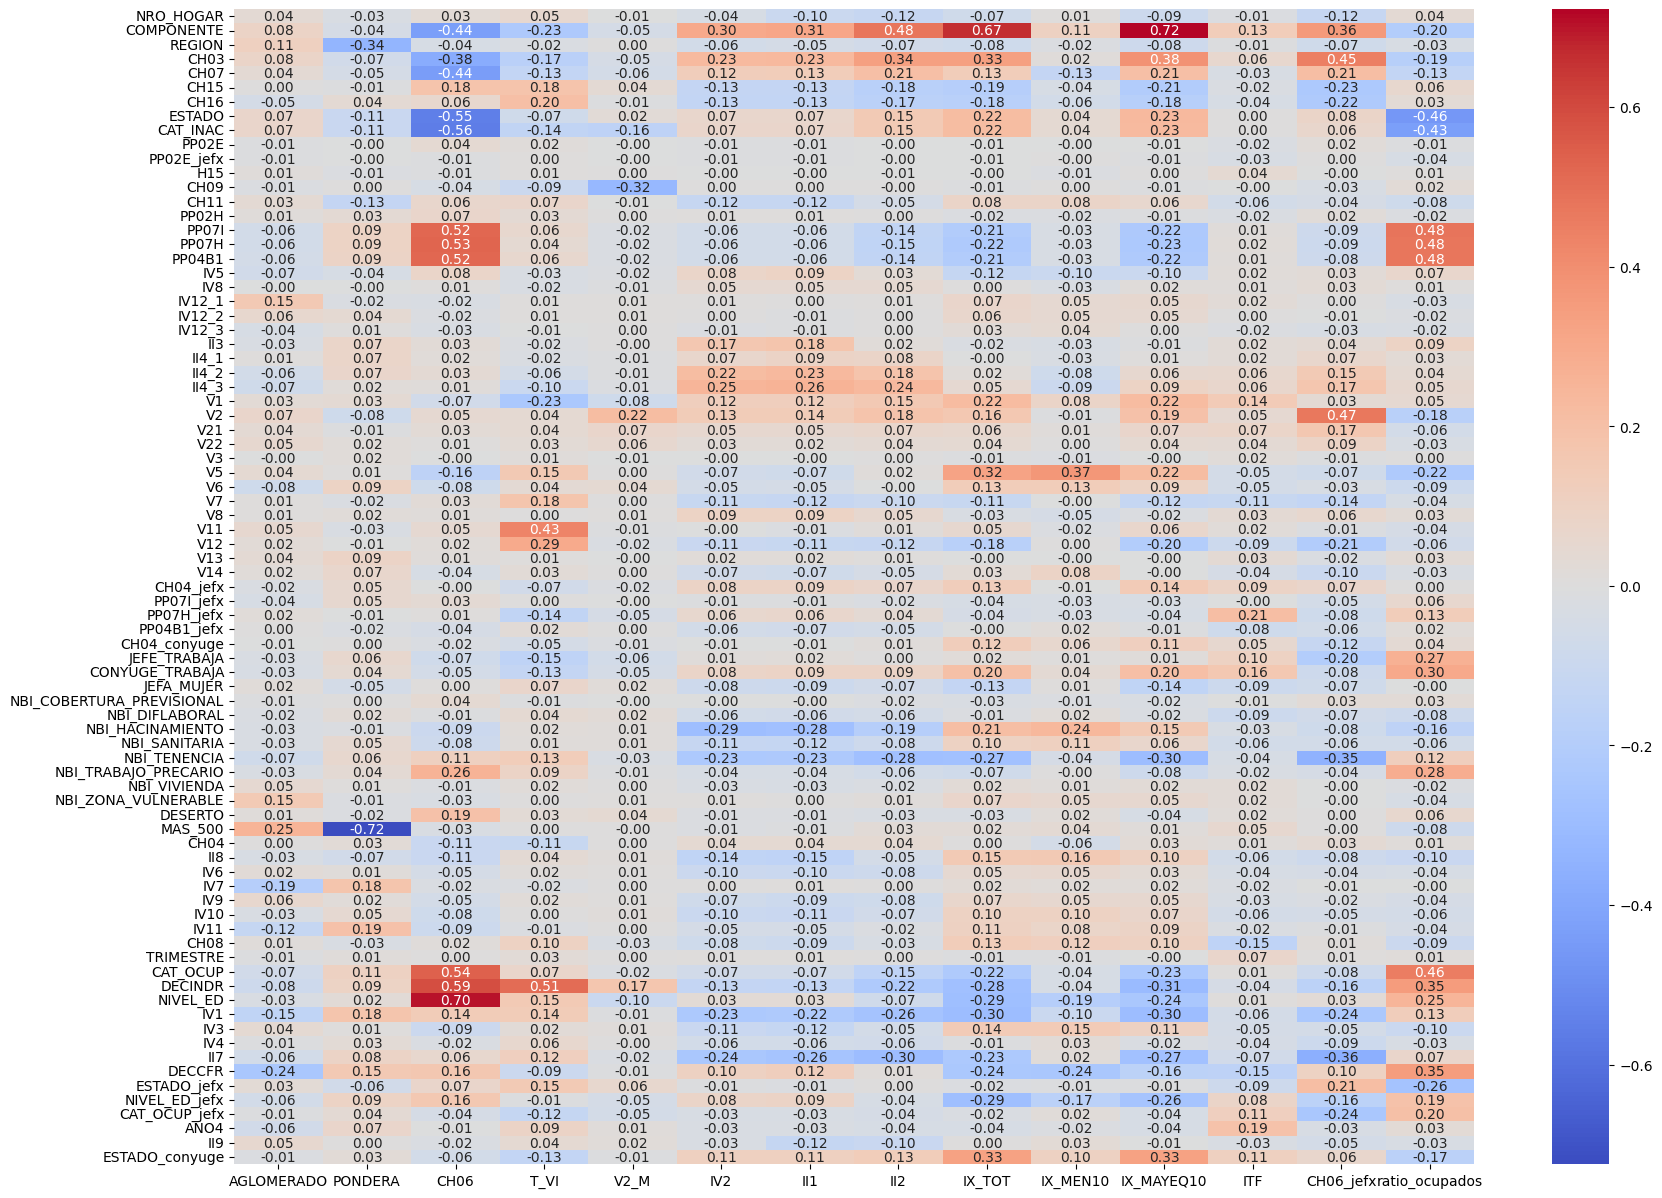

In [21]:
# Crear un heatmap de la matriz de correlación mixta
plt.figure(figsize=(20, 15))
sns.heatmap(correlacion_mixta.dropna().astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### 7.3 Relacion entre Variables Numericas:  Patrones en los Datos

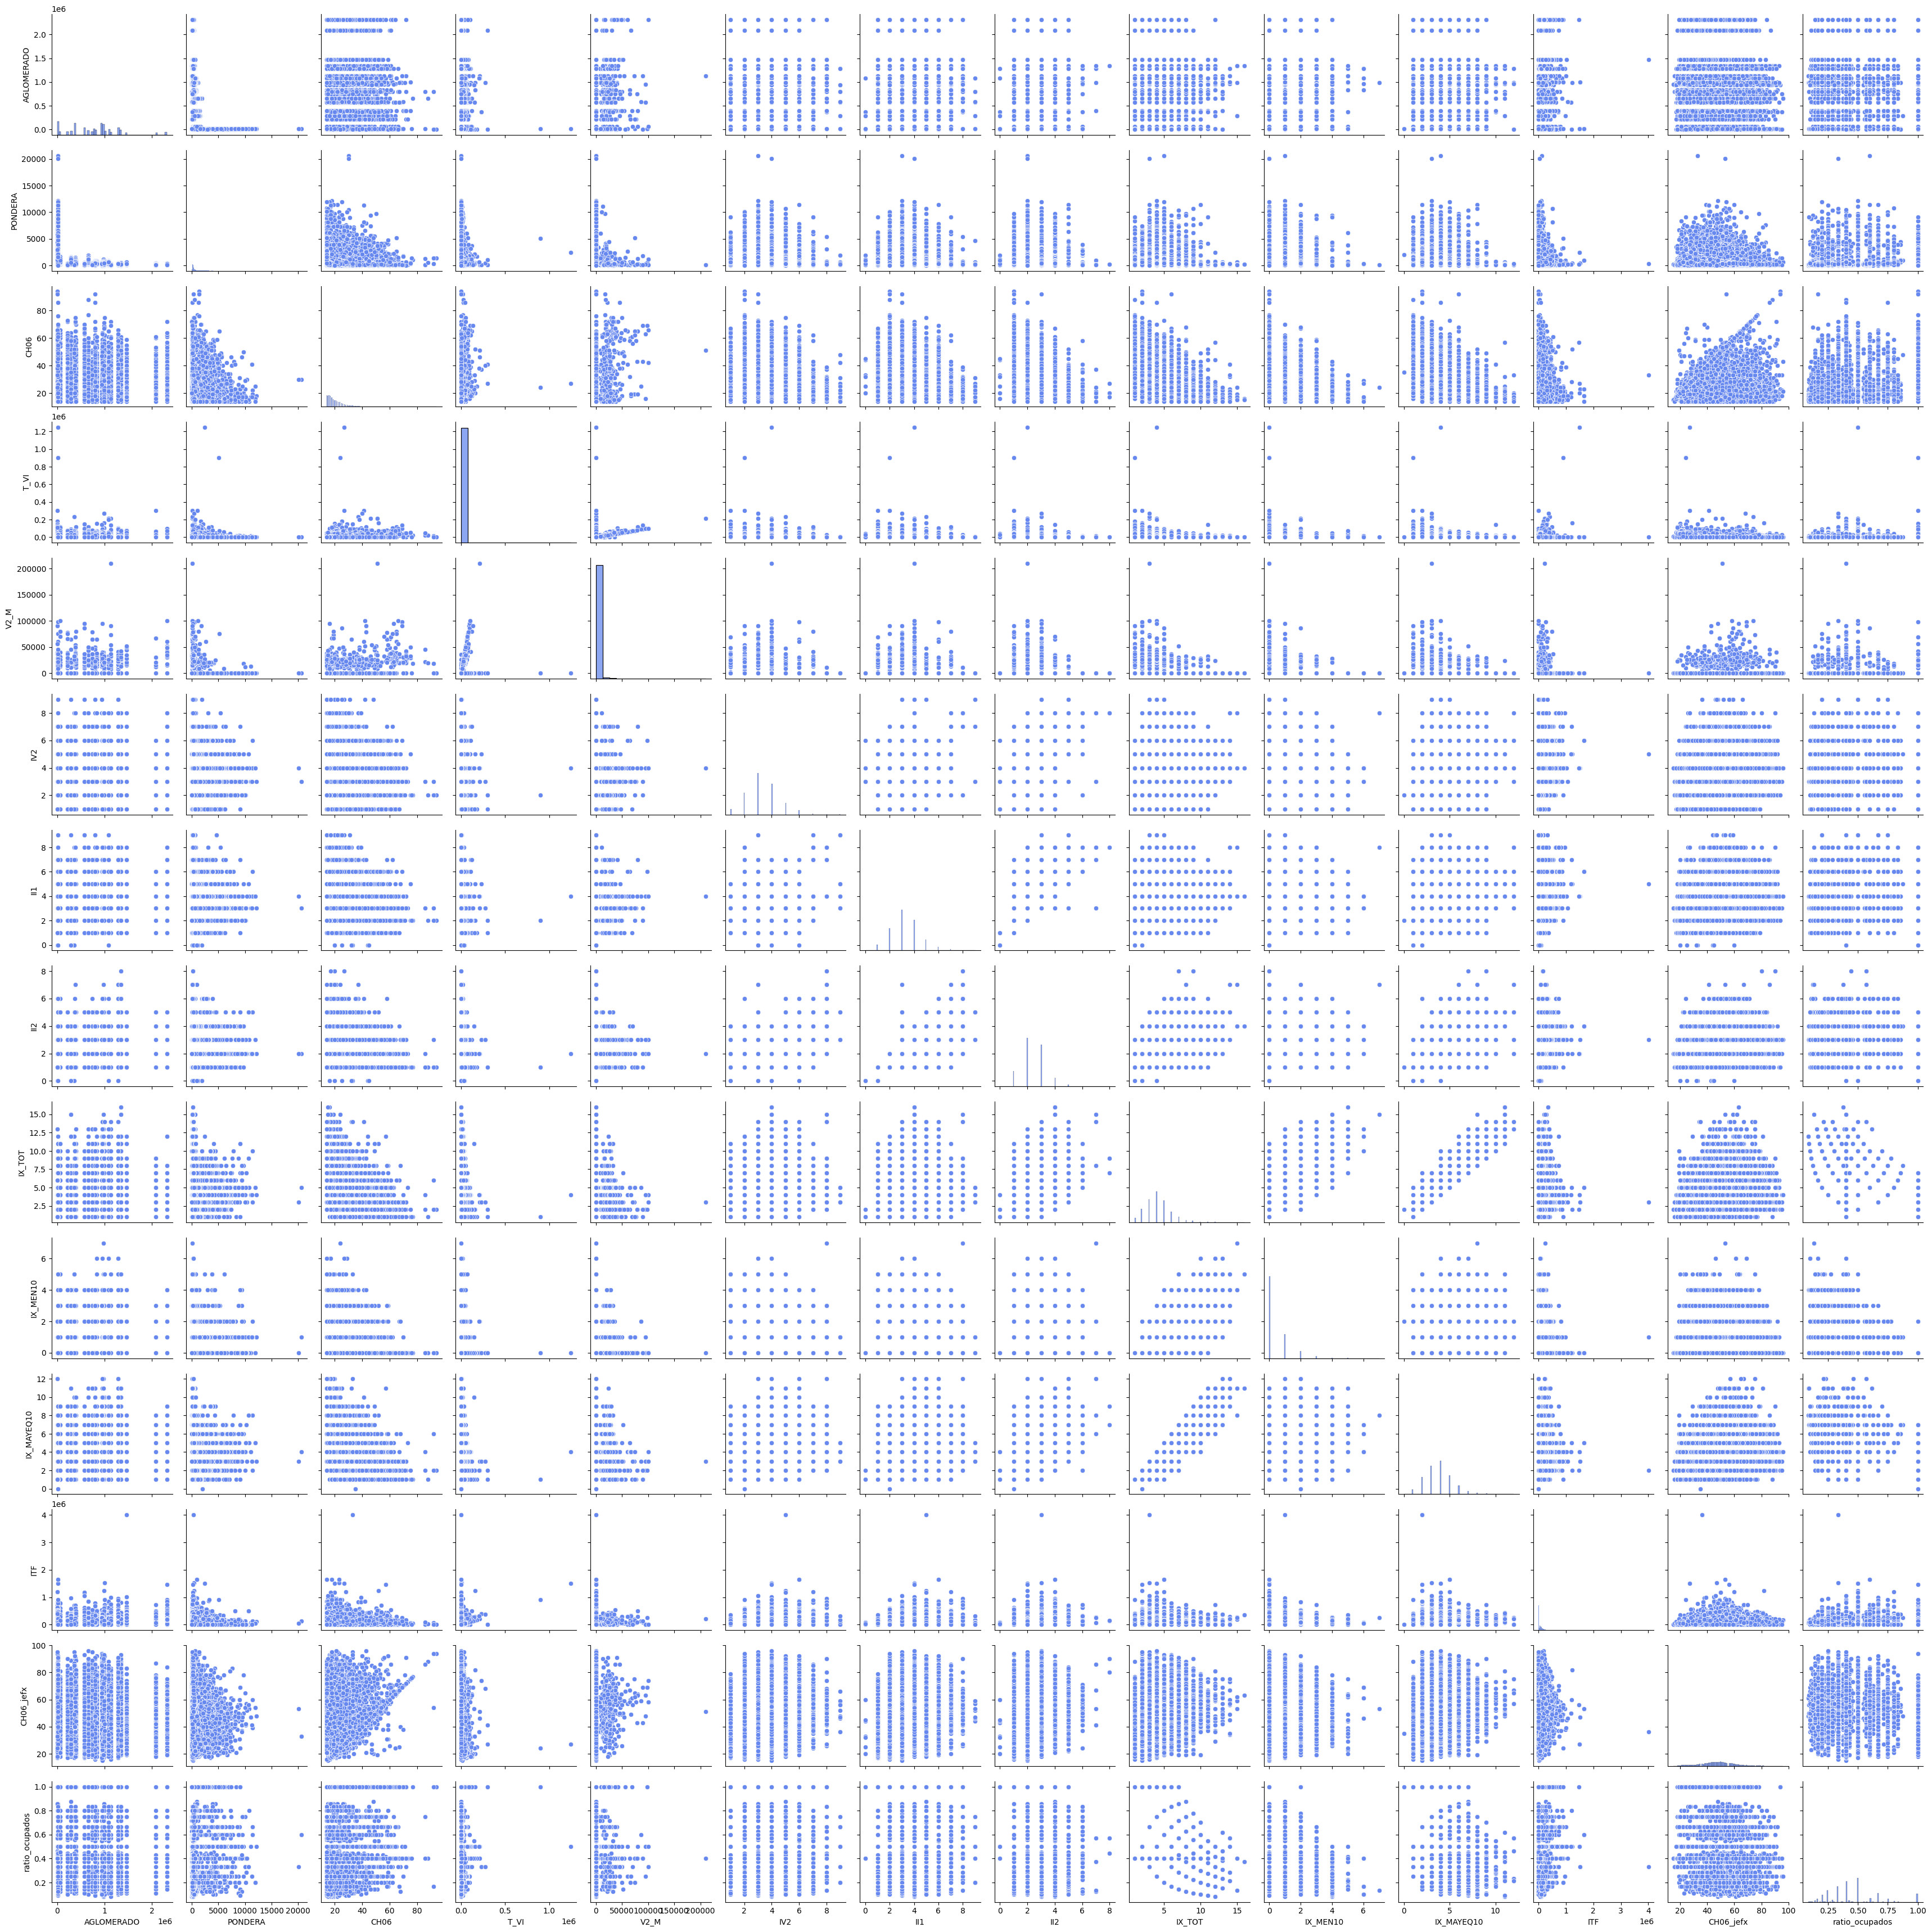

In [22]:
sns.pairplot(df[columnas_numericas])
plt.show()

### 8. Selección de Variables y Eliminación por Colinealidad

Tras observar una alta correlación entre algunas variables, es importante considerar la posibilidad de colinealidad. La colinealidad es una situación en la que dos o más variables predictoras en un modelo de regresión están altamente correlacionadas entre sí. Esto puede causar problemas en el modelo, ya que puede ser difícil determinar el efecto independiente de cada variable sobre la variable de respuesta.

Para ello se tomaron en cuenta dos estrategias:


1.   Eliminar variables redundantes, en caso de existir una alta correlacion entre dos variables se selecciona una de las dos.
2.   Combinar variables, en caso de que una variable se haya elaborado en base a varias variables de la base de datos y existe una alta correlacion, se eliminan las variables constructoras.

#### 8.1 Variables con Colinealidad


| Variable 1           | Variable 2          | Correlación |
|----------------------|---------------------|-------------|
| JEFA_MUJER           | CH04_jefx           | 1.000000    |
| PP04B1               | PP07I               | 0.995660    |
| PP07H                | PP07I               | 0.989912    |
| PP04B1               | PP07H               | 0.989486    |
| ESTADO_jefx          | JEFE_TRABAJA        | 0.988890    |
| NBI_ZONA_VULNERABLE  | IV12_1              | 0.979563    |
| CAT_INAC             | ESTADO              | 0.973569    |
| CAT_OCUP             | ESTADO              | 0.970549    |
| II1                  | IV2                 | 0.961691    |
| IV10                 | NBI_SANITARIA       | 0.948393    |
| CAT_OCUP             | CAT_INAC            | 0.943541    |
| PP07I                | ESTADO              | 0.943430    |
| PP04B1               | ESTADO              | 0.943166    |
| PP07H                | ESTADO              | 0.938650    |
| CAT_OCUP             | PP04B1              | 0.933009    |
| CAT_OCUP             | PP07I               | 0.932862    |
| CAT_OCUP             | PP07H               | 0.931851    |
| IX_MAYEQ10           | IX_TOT              | 0.915869    |
| PP07I                | CAT_INAC            | 0.890376    |
| PP04B1               | CAT_INAC            | 0.890127    |
| PP07H                | CAT_INAC            | 0.885865    |
| CAT_OCUP_jefx        | ESTADO_jefx         | 0.782833    |
| CAT_OCUP_jefx        | JEFE_TRABAJA        | 0.769540    |
| DECINDR              | PP07H               | 0.754505    |
| DECINDR              | PP07I               | 0.747462    |
| DECINDR              | CAT_INAC            | 0.746540    |
| DECINDR              | PP04B1              | 0.745367    |
| DECINDR              | ESTADO              | 0.737321    |
| PONDERA              | MAS_500             | 0.724721    |
| DECINDR              | CAT_OCUP            | 0.724172    |
| IX_MAYEQ10           | COMPONENTE          | 0.722608    |
| II2                  | II1                 | 0.712656    |
| CH06                 | NIVEL_ED            | 0.702664    |
| II2                  | IV2                 | 0.685077    |
| CAT_OCUP_jefx        | PP07H_jefx          | 0.679502    |
| IX_TOT               | COMPONENTE          | 0.665533    |
| II7                  | NBI_TENENCIA        | 0.632394    |
| NBI_TRABAJO_PRECARIO | PP04B1              | 0.629561    |
| NBI_TRABAJO_PRECARIO | PP07I               | 0.626340    |
| CAT_OCUP             | NBI_TRABAJO_PRECARIO| 0.600878    |
| PONDERA              | MAS_500             | 0.724721    |
| IX_MAYEQ10           | COMPONENTE          | 0.722608    |
| CH06                 | NIVEL_ED            | 0.702664    |
| IX_TOT               | COMPONENTE          | 0.665533    |
| CH06                 | DECINDR             | 0.590768    |
| CH06                 | CAT_INAC            | 0.559752    |
| CH06                 | ESTADO              | 0.549878    |
| CH06                 | CAT_OCUP            | 0.537448    |
| CH06                 | PP07H               | 0.527611    |
| CH06                 | PP07I               | 0.520629    |
| CH06                 | PP04B1              | 0.519375    |
| T_VI                 | DECINDR             | 0.506343    |

#### 8.2 Exploración Respecto a las Variables más Importantes con el Modelo de Árbol de Decisión.

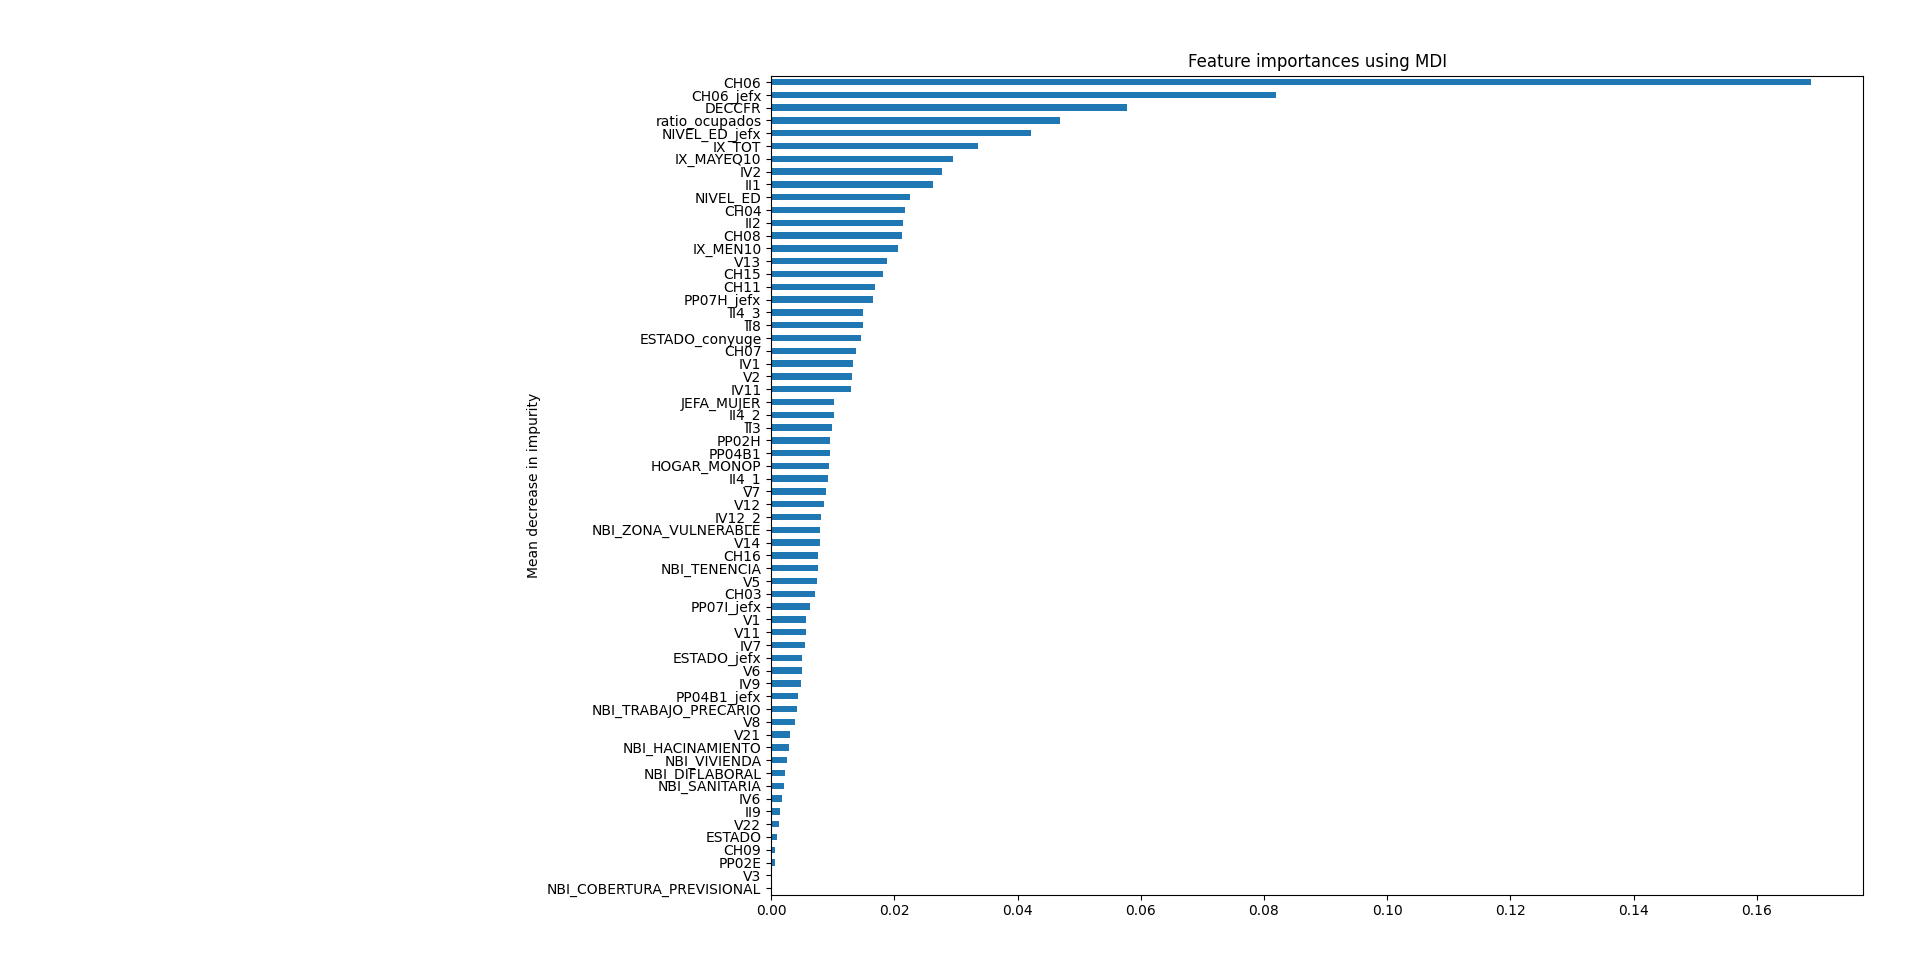

In [11]:
from IPython.display import Image
Image(filename='../images/imagen_MDI.png')


#### 8.3 Variables que Podrian Eliminarse de Manera Automatica


In [24]:
# Crear un DataFrame con los datos de correlación
data = {
    'Variable 1': ['JEFA_MUJER', 'PP04B1', 'PP07H', 'PP04B1', 'ESTADO_jefx', 'NBI_ZONA_VULNERABLE', 'CAT_INAC', 'CAT_OCUP', 'II1', 'IV10', 'CAT_OCUP', 'PP07I', 'PP04B1', 'PP07H', 'CAT_OCUP', 'CAT_OCUP', 'CAT_OCUP', 'IX_MAYEQ10', 'PP07I', 'PP04B1', 'PP07H', 'CAT_OCUP_jefx', 'CAT_OCUP_jefx', 'DECINDR', 'DECINDR', 'DECINDR', 'DECINDR', 'DECINDR', 'PONDERA', 'DECINDR', 'IX_MAYEQ10', 'II2', 'CH06', 'II2', 'CAT_OCUP_jefx', 'IX_TOT', 'II7', 'NBI_TRABAJO_PRECARIO', 'NBI_TRABAJO_PRECARIO', 'CAT_OCUP', 'PONDERA', 'IX_MAYEQ10', 'CH06', 'IX_TOT', 'CH06', 'CH06', 'CH06', 'CH06', 'CH06', 'CH06', 'CH06','T_VI'],
    'Variable 2': ['CH04_jefx', 'PP07I', 'PP07I', 'PP07H', 'JEFE_TRABAJA', 'IV12_1', 'ESTADO', 'ESTADO', 'IV2', 'NBI_SANITARIA', 'CAT_INAC', 'ESTADO', 'ESTADO', 'ESTADO', 'PP04B1', 'PP07I', 'PP07H', 'IX_TOT', 'CAT_INAC', 'CAT_INAC', 'CAT_INAC', 'ESTADO_jefx', 'JEFE_TRABAJA', 'PP07H', 'PP07I', 'CAT_INAC', 'PP04B1', 'ESTADO', 'MAS_500', 'CAT_OCUP', 'COMPONENTE', 'II1', 'NIVEL_ED', 'IV2', 'PP07H_jefx', 'COMPONENTE', 'NBI_TENENCIA', 'PP04B1', 'PP07I', 'NBI_TRABAJO_PRECARIO', 'MAS_500', 'COMPONENTE', 'NIVEL_ED', 'COMPONENTE', 'DECINDR', 'CAT_INAC', 'ESTADO', 'CAT_OCUP', 'PP07H', 'PP07I', 'PP04B1', 'DECINDR'],
    'Correlacion': [1.0, 0.995660, 0.989912, 0.989486, 0.988890, 0.979563, 0.973569, 0.970549, 0.961691, 0.948393, 0.943541, 0.943430, 0.943166, 0.938650, 0.933009, 0.932862, 0.931851, 0.915869, 0.890376, 0.890127, 0.885865, 0.782833, 0.769540, 0.754505, 0.747462, 0.746540, 0.745367, 0.737321, 0.724721, 0.724172, 0.722608, 0.712656, 0.702664, 0.685077, 0.679502, 0.665533, 0.632394, 0.629561, 0.626340, 0.600878, 0.724721, 0.722608, 0.702664, 0.665533, 0.590768, 0.559752, 0.549878, 0.537448, 0.527611, 0.520629, 0.519375, 0.506343]
}

df_correlaciones = pd.DataFrame(data)

# Variables que ya fueron eliminadas
variables_eliminadas = set()

# Lista para almacenar las variables a eliminar
variables_por_eliminar = []

while True:
    # Encontrar la correlación más alta que no ha sido eliminada
    correlacion_max = df_correlaciones[~df_correlaciones['Variable 1'].isin(variables_eliminadas) & ~df_correlaciones['Variable 2'].isin(variables_eliminadas)]['Correlacion'].max()

    # Si no hay más correlaciones por encima de un umbral, salir del bucle
    if pd.isnull(correlacion_max) or correlacion_max < 0.7:
        break

    # Obtener las variables con la correlación más alta
    variables_correlacion_max = df_correlaciones[(df_correlaciones['Correlacion'] == correlacion_max) & (~df_correlaciones['Variable 1'].isin(variables_eliminadas)) & (~df_correlaciones['Variable 2'].isin(variables_eliminadas))]
    variable_1 = variables_correlacion_max['Variable 1'].values[0]
    variable_2 = variables_correlacion_max['Variable 2'].values[0]

    # Agregar las variables a la lista de eliminadas
    variables_eliminadas.add(variable_1)
    variables_eliminadas.add(variable_2)

    # Agregar las variables a la lista de variables por eliminar
    variables_por_eliminar.append(variable_1)
    variables_por_eliminar.append(variable_2)

conteo_elementos = len(variables_por_eliminar)

print("Variables que podrian eliminarse por colinealidad:", variables_por_eliminar)
print(f"Número de elementos que podrian eliminarse: {conteo_elementos}")


Variables que podrian eliminarse por colinealidad: ['JEFA_MUJER', 'CH04_jefx', 'PP04B1', 'PP07I', 'ESTADO_jefx', 'JEFE_TRABAJA', 'NBI_ZONA_VULNERABLE', 'IV12_1', 'CAT_INAC', 'ESTADO', 'II1', 'IV2', 'IV10', 'NBI_SANITARIA', 'CAT_OCUP', 'PP07H', 'IX_MAYEQ10', 'IX_TOT', 'PONDERA', 'MAS_500', 'CH06', 'NIVEL_ED']
Número de elementos que podrian eliminarse: 22


#### 8.4 Variables Eliminadas por Analisis de Experto

| Variable analizada                  | Variable a dejar            |
|-------------------------------------|-----------------------------|
| IV8, II9                            | II9                         |
| IX_TOT, IX_MEN10, IX_MAYEQ          | IX_TOT e IX_MEN10           |
| ESTADO, CAT_OCUP, CAT_INAC          | ESTADO                      |
| ESTADO_jefx, CAT_OCUP_jefx, JEFE_TRABAJA | ESTADO_jefx         |
| PP07H_jefx, PP07I_jefx              | PP07I_jefx                  |
| T_VI, V2_M                          |                             |
| JEFA_MUJER, CH04_conyuge, CH04_jefx | JEFA_MUJER       |
| PP04B1                              | renombrar a Servicio_doméstico          |
| REALIZADA_jefx, REALIZADA_conyuge, NBI_SUBSISTENCIA, IV10 | NBI_SANITARIA |
| IV3, IV4 e IV5                      | NBI_VIVIENDA                |
| II7                                 | NBI_TENENCIA                |
| II7, IV12_1, IV12_3                 | NBI_ZONA_VULNERABLE         |
| PP07I y PP07H                       | NBI_TRABAJO_PRECARIO        |
| PP02E_jefx                          | NBI_DIFLABORAL              |


In [28]:
eliminadas_experto = ['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'CH09', 'CH10','CH16', 'IV8', 'IX_MAYEQ', 'CAT_OCUP', 
                      'CAT_INAC', 'PP02E_jefx','CAT_OCUP_jefx', 'JEFE_TRABAJA', 'PP07H_jefx', 'T_VI', 
                      'V2_M', 'CH04_conyuge', 'PP07I_jefx', 'PP04B1', 'ESTADO_jefx',  'II9', 'CH04_jefx', 
                      'REALIZADA_jefx', 'REALIZADA_conyuge', 'NBI_SUBSISTENCIA', 'IV10', 'II7', 'IV12_1', 
                      'IV12_3', 'PP07I', 'PP07H', 'PP02E_jefx'
                      ]
#Comparacion de variables a eliminar
elementos_comunes = set(eliminadas_experto) & set(variables_por_eliminar)

print(f"Elementos comunes a ambas listas: {elementos_comunes}")
print(f"Número de elementos comunes: {len(elementos_comunes)}")
print(f"Número de elementos de la lista de variables eliminadas por experto: {len(eliminadas_experto)}")

Elementos comunes a ambas listas: {'PP07H', 'CAT_INAC', 'IV10', 'CH04_jefx', 'ESTADO_jefx', 'IV12_1', 'JEFE_TRABAJA', 'PP04B1', 'CAT_OCUP', 'PP07I'}
Número de elementos comunes: 10
Número de elementos de la lista de variables eliminadas por experto: 32


### 9. Diccionario de variables seleccionadas

| COLUMNA          | TIPO DE DATO ORIGEN | TIPO DE DATO OBJETIVO | OBSERVACIONES                                                                                                                                                                                                                                                                                           | DEFINICION                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|------------------|----------------------|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| H15              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Entrevista individual realizada 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| REGION           | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | Código de Región 01 = Gran Buenos Aires 40 = Noroeste 41 = Nordeste 42 = Cuyo 43 = Pampeana 44 = Patagónica                                                                                                                                                                                                                                                                                                                                                                      |
| AGLOMERADO       | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | Código de Aglomerado 02 = Gran La Plata 03 = Bahía Blanca - Cerri 04 = Gran Rosario 05 = Gran Santa Fé 06 = Gran Paraná 07 = Posadas 08 = Gran Resistencia 09 = Cdro. Rivadavia - R.Tilly 10 = Gran Mendoza 12 = Corrientes 13 = Gran Córdoba 14 = Concordia 15 = Formosa 17 = Neuquén – Plottier 18 = S.del Estero - La Banda 19 = Jujuy - Palpalá 20 = Río Gallegos                                                                                                                                                                              |
| CH03             | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | Relación de Parentesco 01 = Jefe/a 02 = Cónyuge/Pareja 03 = Hijo/Hijastro/a 04 = Yerno/Nuera 05 = Nieto/a 06 = Madre/Padre 07 = Suegro/a 08 = Hermano/a 09 = Otros Familiares 10 = No Familiares                                                                                                                                                                                                                                                                                  |
| CH04             | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Sexo 1 = varón 2 = mujer                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| CH07             | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | ¿Actualmente está...1 = unido? 2 = casado? 3 = separado/a ó divorciado/a? 4 = viudo/a? 5 = soltero/a?                                                                                                                                                                                                                                                                                                                                                                             |
| CH15             | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | ¿Dónde nació? 1. En esta localidad 2. En otra localidad de esta provincia 3. En otra provincia (especificar) 4. En un país limítrofe (especificar Brasil, Bolivia, Chile, Paraguay, Uruguay) 5. En otro país (especificar) 9. N/S.N/R.                                                                                                                                                                                                                                                                                                          |
| ESTADO           | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | CONDICIÓN DE ACTIVIDAD 0 = Entrevista individual no realizada ( no respuesta al Cuestionario Individual) 1 = Ocupado 2 = Desocupado 3 = Inactivo 4 = Menor de 10 años                                                                                                                                                                                                                                                                                                           |
| PP02E            | int64                | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                     | Durante esos 30 días, no buscó trabajo porque...1= está suspendido 2= ya tiene trabajo asegurado 3= se cansó de buscar trabajo 4= hay poco trabajo en esta época del año 5= por otras razones                                                                                                                                                                                                                                                                                 |
| PP02H            | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | En los últimos 12 meses ¿buscó trabajo en algún momento? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                                           |
| REALIZADA        | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Entrevista Realizada = Si = No (hogar no respuesta)                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IV5              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | El techo tiene cielorraso/revestimiento interior? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                                                  |
| IV12_2           | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | La vivienda está ubicada en zona inundable (en los últimos 12 meses) 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                               |
| II3              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Utiliza alguno exclusivamente como lugar de Trabajo (para consultorio, estudio, taller, negocio, etc.) 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                            |
| II4_1            | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Cuarto de cocina 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| II4_2            | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Lavadero 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| II4_3            | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | Garage 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| V1               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......de lo que ganan en el trabajo? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                             |
| V2               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......de alguna jubilación o pensión? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                              |
| V21              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......Aguinaldo de alguna jubilación o pensión cobrada el mes anterior. 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                         |
| V22              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......Retroactivo de alguna jubilación o pensión que cobró el mes anterior. 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                       |
| V3               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......de indemnización por despido? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                               |
| V5               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......de subsidio o ayuda social(en dinero)del gobierno, iglesias, etc.? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                          |
| V6               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido... ...con mercaderías, ropa, alimentos del gobierno, iglesias, escuelas, etc.? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                    |
| V7               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......con mercaderías, ropa, alimentos de familiares, vecinos u otras personas que no viven en este hogar? 1 = Si 2 = No                                                                                                                                                                                                                                                                                         |
| V8               | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......algún alquiler (por una vivienda, terreno, oficina, etc.)de su propiedad? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                     |
| V11              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......una beca de estudio? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                                         |
| V12              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido.........cuotas de alimentos o ayuda en dinero de personas que no viven en el hogar? 1 = Si 2 = No                                                                                                                                                                                                                                                                                                              |
| V13              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......gastar lo que tenían ahorrado? 1 = Si  2 = No                                                                                                                                                                                                                                                                                                                                                            |
| V14              | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | ¿En los últimos tres meses, las personas de este hogar han vivido......pedir préstamos a familiares/amigos 1 = Si 2 = No                                                                                                                                                                                                                                                                                                                                                        |
| CONYUGE_TRABAJA  | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| JEFA_MUJER       | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| HOGAR_MONOP      | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_COBERTURA_PREVISIONAL | int64         | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_HACINAMIENTO | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_SANITARIA    | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_TENENCIA     | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_TRABAJO_PRECARIO | int64            | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_VIVIENDA     | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                 | 1= Si 0= No                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| NBI_ZONA_VULNERABLE     | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                                                                                                | 1= Si 0= No                                                                                                                                                                                                                                                                           |
| DESERTO                | int64                | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                                                                                                | 1= Si 0= No                                                                                                                                                                                                                                                                           |
| CH11                   | float64              | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                                                                                                | Ese establecimiento es...1 = Público 2 = Privado 9 = Ns./Nr.                                                                                                                                                                                                                            |
| PP04B1_jefx            | float64              | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                                                                                                | Si presta servicio doméstico en hogares Particulares 1 = casa de familia                                                                                                                                                                                                              |
| NBI_DIFLABORAL         | float64              | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                                                                                                | 1= Si 0= No                                                                                                                                                                                                                                                                           |
| MAS_500                | object               | Categorico nominal     | binario                                                                                                                                                                                                                                                                                                                                                                                | Aglomerados según tamaño N = Conjunto de Aglomerados de menos de 500.000hab. S = Conjunto de Aglomerados de 500.000 y más hab.                                                                                                                                                        |
| II8                    | object               | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Combustible utilizado para cocinar 01 = Gas de red 02 = Gas de tubo/garrafa 03 = Kerosene/ leña/ carbón                                                                                                                                                                                |
| IV6                    | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Tiene agua.....1. Por cañería dentro de la vivienda 2. Fuera de la vivienda pero dentro del terreno 3. Fuera del terreno                                                                                                                                                               |
| IV7                    | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | El agua es de.....1. Red pública (agua corriente) 2. Perforación con bomba a motor 3. Perforación con bomba manual                                                                                                                                                                      |
| IV9                    | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | El baño o letrina está....1. Dentro de la vivienda 2. Fuera de la vivienda pero dentro del terreno 3. Fuera del terreno                                                                                                                                                                  |
| IV11                   | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | El desague del baño es....1. A red pública (cloaca)  2. A cámara séptica y pozo ciego 3. Sólo a pozo ciego 4. A hoyo/excavación en al tierra                                                                                                                                           |
| CH08                   | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | ¿Tiene algún tipo de cobertura médica por la que paga o le descuentan? 1 = Obra social (incluye PAMI) 2 = Mutual / Prepaga / Servicio de emergencia 3 = Planes y seguros públicos 4 = No paga ni le descuentan 9 = Ns./Nr. 12= Obra social y emergencia. 13= Obra social y Planes y Seguros Públicos 23= Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos 123:obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicosmutual/prepaga/servicio de |
| TRIMESTRE              | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Ventana de observación 1 = 1er. Trimestre 2 = 2do. Trimestre 3 = 3er. Trimestre 4 = 4to. Trimestre                                                                                                                                                                                      |
| DECINDR                | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Nº de decil de ingreso total individual del TOTAL EPH (ver Anexo I). 00 = Sin ingresos 1 = decil 1 2 = decil 2 3 = decil 3 4 = decil 4 5 = decil 5 6 = decil 6 7 = decil 7 8 = decil 8 9 = decil 9 10 = decil 10 12 = No respuesta de ingresos 13 = Entrevista individual no realizada                                                                     |
| NIVEL_ED               | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | NIVEL EDUCATIVO 1 = Primaria Incompleta(incluye educación especial) 2 = Primaria Completa 3 = Secundaria Incompleta 4 = Secundaria Completa 5 = Superior Universitaria Incompleta 6 = Superior Universitaria Completa 7 = Sin instrucción 9 = Ns./ Nr.                                                                                                                                                         |
| IV1                    | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Tipo de vivienda ( por observación) 1. Casa 2. Departamento 3. Pieza de inquilinato 4. Pieza en hotel/pensión 5. Local no construido para habitación                                                                                                                                   |
| IV3                    | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Los pisos interiores son principalmente de.....1. Mosaico/baldosa/madera/cerámica/alfombra 2. Cemento/ladrillo fijo 3. Ladrillo suelto/tierra                                                                                                                                              |
| IV4                    | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | La cubierta exterior del techo es de.... 1. Membrana/cubierta asfáltica  2. Baldosa/losa sin cubierta  3. Pizarra/teja  4. Chapa de metal sin cubierta  5. Chapa de fibrocemento/plástico  6. Chapa de cartón  7. Caña/tabla/paja con barro/paja sola 9. N/S. Depto en propiedad horizontal                                                                 |
| DECCFR                 | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | Nº de decil del ingreso per cápita familiar del TOTAL EPH (ver Anexo I).                                                                                                                                                                                                                                                                              |
| NIVEL_ED_jefx          | int64                | Categorico ordinal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | NIVEL EDUCATIVO 1 = Primaria Incompleta(incluye educación especial) 2 = Primaria Completa 3 = Secundaria Incompleta 4 = Secundaria Completa 5 = Superior Universitaria Incompleta 6 = Superior Universitaria Completa 7 = Sin instrucción 9 = Ns./ Nr.                                                                                                                                                         |
| ESTADO_conyuge         | float64              | Categorico nominal     | OHE                                                                                                                                                                                                                                                                                                                                                                                    | CONDICIÓN DE ACTIVIDAD 0 = Entrevista individual no realizada ( no respuesta al Cuestionario Individual) 1 = Ocupado 2 = Desocupado 3 = Inactivo 4 = Menor de 10 años                                                                                                                                                                               |
| ANO4                   | int64                | Categorico ordinal     | Numerico entero tratar  como 1 y 2                                                                                                                                                                                                                                                                                                                                                     | Año en que se realizó la encuesta.                                                                                                                                                                                                                                                                                                                  |
| PONDERA                | int64                | Numerico entero        | normalizacion                                                                                                                                                                                                                                                                                                                                                                          | Ponderación                                                                                                                                                                                                                                                                           |
| CH06                   | int64                | Numerico entero        | pueden servir rangos                                                                                                                                                                                                                                                                                                                                                                  | ¿Cuántos años cumplidos tiene?                                                                                                                                                                                                                                                                                                                      |
| IV2                    | int64                | Numerico entero        | Numerico entero                                                                                                                                                                                                                                                                                                                                                                        | Cuántos ambientes/ habitaciones tiene la vivienda en total? (sin contar baño/s, cocina, pasillo/s, lavadero, garage)                                                                                                                                                                |
| II1                    | int64                | Numerico entero        | Numerico entero                                                                                                                                                                                                                                                                                                                                                                        | Cuántos ambientes/ habitaciones tiene este hogar para su uso exclusivo?                                                                                                                                                                                                                                                                              |
| II2                    | int64                | Numerico entero        | Numerico entero                                                                                                                                                                                                                                                                                                                                                                        | De esos, cuántos usan habitualmente para dormir?                                                                                                                                                                                                                                                                                                    |
| IX_TOT                 | int64                | Numerico entero        | Numerico entero                                                                                                                                                                                                                                                                                                                                                                        | Cantidad de miembros del Hogar                                                                                                                                                                                                                                                                                                                     |
| IX_MEN10               | int64                | Numerico entero        | Numerico entero                                                                                                                                                                                                                                                                                                                                                                        | Cantidad de miembros del Hogar menores de 10 años                                                                                                                                                                                                                                                                                                   |
| ITF                    | int64                | Numerico entero        | Numerico entero                                                                                                                                                                                                                                                                                                                                                                        | MONTO DE INGRESO TOTAL FAMILIAR(ver Anexo I)                                                                                                                                                                                                                                                                                                        |
| CH06_jefx              | int64                | Numerico entero        | normalizacion                                                                                                                                                                                                                                                                                                                                                                          | ¿Cuántos años cumplidos tiene?                                                                                                                                                                                                                                                                                                                      |
| ratio_ocupados         | float64              | Numerico float         | normalizacion                                                                                                                                                                                                                                                                                                                                                                          | Numerico                                                                                                                                                                                                                                                                                                                                             |


